In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import wordcloud
nltk.download('stopwords')
nltk.download('wordnet')
import warnings
warnings.simplefilter("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import datetime

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\soham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\soham\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#Importing Libraries
from nltk.util import *
from nltk.sentiment.util import *

In [3]:
#Importing Libraries
from textblob import TextBlob
from tensorflow.keras.preprocessing.text import Tokenizer

In [4]:
#Importing Dataset
df_usa=pd.read_csv("USvideos.csv")
df_india = pd.read_csv("INvideos.csv")

# Exploratory Data Analysis - USA Dataframe

In [5]:
#USA Dataframe Info
df_usa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [6]:
df_usa

video_id trending_date  \
0      2kyS6SvSYSE      17.14.11   
1      1ZAPwfrtAFY      17.14.11   
2      5qpjK5DgCt4      17.14.11   
3      puqaWrEC7tY      17.14.11   
4      d380meD0W0M      17.14.11   
...            ...           ...   
40944  BZt0qjTWNhw      18.14.06   
40945  1h7KV2sjUWY      18.14.06   
40946  D6Oy4LfoqsU      18.14.06   
40947  oV0zkMe1K8s      18.14.06   
40948  ooyjaVdt-jA      18.14.06   

                                                   title  \
0                     WE WANT TO TALK ABOUT OUR MARRIAGE   
1      The Trump Presidency: Last Week Tonight with J...   
2      Racist Superman | Rudy Mancuso, King Bach & Le...   
3                       Nickelback Lyrics: Real or Fake?   
4                               I Dare You: GOING BALD!?   
...                                                  ...   
40944                       The Cat Who Caught the Laser   
40945                         True Facts : Ant Mutualism   
40946  I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...   
40947                How Black Panther Should Have Ended   
40948  Official Call of Duty®: Black Ops 4 — Multipla...   

                  channel_title  category_id              publish_time  \
0                  CaseyNeistat           22  2017-11-13T17:13:01.000Z   
1               LastWeekTonight           24  2017-11-13T07:30:00.000Z   
2                  Rudy Mancuso           23  2017-11-12T19:05:24.000Z   
3         Good Mythical Morning           24  2017-11-13T11:00:04.000Z   
4                      nigahiga           24  2017-11-12T18:01:41.000Z   
...                         ...          ...                       ...   
40944             AaronsAnimals           15  2018-05-18T13:00:04.000Z   
40945                  zefrank1           22  2018-05-18T01:00:06.000Z   
40946                Brad Mondo           24  2018-05-18T17:34:22.000Z   
40947  How It Should Have Ended            1  2018-05-17T17:00:04.000Z   
40948              Call of Duty           20  2018-05-17T17:09:38.000Z   

                                                    tags     views   likes  \
0                                        SHANtell martin    748374   57527   
1      last week tonight trump presidency|"last week ...   2418783   97185   
2      racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434  146033   
3      rhett and link|"gmm"|"good mythical morning"|"...    343168   10172   
4      ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095731  132235   
...                                                  ...       ...     ...   
40944  aarons animals|"aarons"|"animals"|"cat"|"cats"...   1685609   38160   
40945                                             [none]   1064798   60008   
40946  I gave safiya nygaard a perfect hair makeover ...   1066451   48068   
40947  Black Panther|"HISHE"|"Marvel"|"Infinity War"|...   5660813  192957   
40948      call of duty|"cod"|"activision"|"Black Ops 4"  10306119  357079   

       dislikes  comment_count  \
0          2966          15954   
1          6146          12703   
2          5339           8181   
3           666           2146   
4          1989          17518   
...         ...            ...   
40944      1385           2657   
40945       382           3936   
40946      1032           3992   
40947      2846          13088   
40948    212976         144795   

                                       thumbnail_link  comments_disabled  \
0      https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg              False   
1      https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg              False   
2      https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg              False   
3      https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg              False   
4      https://i.ytimg.com/vi/d380meD0W0M/default.jpg              False   
...                                               ...                ...   
40944  https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg              False   
40945  https:

In [7]:
#Converting trending_date and publish_time columns to datetime datatype in USA Dataframe
df_usa['trending_date'] = pd.to_datetime(df_usa['trending_date'], format='%y.%d.%m')
df_usa['publish_time'] = pd.to_datetime(df_usa['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [8]:
#Spilling publish_time column into publish_date and publish_time separate columns in USA Dataframe
df_usa.insert(4, 'publish_date', df_usa['publish_time'].dt.date)
df_usa['publish_time'] = df_usa['publish_time'].dt.time
df_usa['publish_date']=pd.to_datetime(df_usa['publish_date'])

In [9]:
#USA Dataframe Info
df_usa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                40949 non-null  object        
 1   trending_date           40949 non-null  datetime64[ns]
 2   title                   40949 non-null  object        
 3   channel_title           40949 non-null  object        
 4   publish_date            40949 non-null  datetime64[ns]
 5   category_id             40949 non-null  int64         
 6   publish_time            40949 non-null  object        
 7   tags                    40949 non-null  object        
 8   views                   40949 non-null  int64         
 9   likes                   40949 non-null  int64         
 10  dislikes                40949 non-null  int64         
 11  comment_count           40949 non-null  int64         
 12  thumbnail_link          40949 non-null  object

In [10]:
#checking if any null values in USA dataframe
df_usa.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
publish_date                0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

In [11]:
#Replacing null values with a string in USA Dataframe
df_usa.description = df_usa.description.fillna('Description Not Found')

In [12]:
df_usa

video_id trending_date  \
0      2kyS6SvSYSE    2017-11-14   
1      1ZAPwfrtAFY    2017-11-14   
2      5qpjK5DgCt4    2017-11-14   
3      puqaWrEC7tY    2017-11-14   
4      d380meD0W0M    2017-11-14   
...            ...           ...   
40944  BZt0qjTWNhw    2018-06-14   
40945  1h7KV2sjUWY    2018-06-14   
40946  D6Oy4LfoqsU    2018-06-14   
40947  oV0zkMe1K8s    2018-06-14   
40948  ooyjaVdt-jA    2018-06-14   

                                                   title  \
0                     WE WANT TO TALK ABOUT OUR MARRIAGE   
1      The Trump Presidency: Last Week Tonight with J...   
2      Racist Superman | Rudy Mancuso, King Bach & Le...   
3                       Nickelback Lyrics: Real or Fake?   
4                               I Dare You: GOING BALD!?   
...                                                  ...   
40944                       The Cat Who Caught the Laser   
40945                         True Facts : Ant Mutualism   
40946  I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...   
40947                How Black Panther Should Have Ended   
40948  Official Call of Duty®: Black Ops 4 — Multipla...   

                  channel_title publish_date  category_id publish_time  \
0                  CaseyNeistat   2017-11-13           22     17:13:01   
1               LastWeekTonight   2017-11-13           24     07:30:00   
2                  Rudy Mancuso   2017-11-12           23     19:05:24   
3         Good Mythical Morning   2017-11-13           24     11:00:04   
4                      nigahiga   2017-11-12           24     18:01:41   
...                         ...          ...          ...          ...   
40944             AaronsAnimals   2018-05-18           15     13:00:04   
40945                  zefrank1   2018-05-18           22     01:00:06   
40946                Brad Mondo   2018-05-18           24     17:34:22   
40947  How It Should Have Ended   2018-05-17            1     17:00:04   
40948              Call of Duty   2018-05-17           20     17:09:38   

                                                    tags     views   likes  \
0                                        SHANtell martin    748374   57527   
1      last week tonight trump presidency|"last week ...   2418783   97185   
2      racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434  146033   
3      rhett and link|"gmm"|"good mythical morning"|"...    343168   10172   
4      ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095731  132235   
...                                                  ...       ...     ...   
40944  aarons animals|"aarons"|"animals"|"cat"|"cats"...   1685609   38160   
40945                                             [none]   1064798   60008   
40946  I gave safiya nygaard a perfect hair makeover ...   1066451   48068   
40947  Black Panther|"HISHE"|"Marvel"|"Infinity War"|...   5660813  192957   
40948      call of duty|"cod"|"activision"|"Black Ops 4"  10306119  357079   

       dislikes  comment_count  \
0          2966          15954   
1          6146          12703   
2          5339           8181   
3           666           2146   
4          1989          17518   
...         ...            ...   
40944      1385           2657   
40945       382           3936   
40946      1032           3992   
40947      2846          13088   
40948    212976         144795   

                                       thumbnail_link  comments_disabled  \
0      https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg              False   
1      https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg              False   
2      https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg              False   
3      https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg              False   
4      https://i.ytimg.com/vi/d380meD0W0M/default.jpg              False   
...                                               ...                ...   
40944  https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg              False   
40945  https:

In [13]:
#checking if any null values in USA dataframe
df_usa.isnull().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
publish_date              0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
dtype: int64

In [14]:
#Top 10 channels with most total views on trending videos from USA
df_usa.groupby('channel_title')['views'].sum().reset_index().sort_values(by='views',ascending=False).head(10)

channel_title       views
358           ChildishGambinoVEVO  3758488765
2094                      ibighit  2235906679
541                  Dude Perfect  1870085178
1129         Marvel Entertainment  1808998971
110              ArianaGrandeVevo  1576959172
1107                   MalumaVEVO  1551515831
2112             jypentertainment  1486972132
1614  Sony Pictures Entertainment  1432374398
650                  FoxStarHindi  1238609854
177                    BeckyGVEVO  1182971286

In [15]:
#Top 10 channels with least total views on trending videos from USA
df_usa.groupby('channel_title')['views'].sum().reset_index().sort_values(by='views',ascending=True).head(10)

channel_title  views
18                         90s Commercials    773
698                          GoDucksdotcom   1391
1319  OjO Commuter Scooter by OjO Electric   1706
1863                          Total Combat   1722
293                            CHauserable   1807
872                           Jenny Hanell   1827
1349                      Palo Alto Online   2116
1642                          Steve Kovach   2259
1941                           Vostok.bike   2322
392                       Cleveland Browns   2416

In [16]:
#Top 10 channels with most total likes on trending videos from USA
df_usa.groupby('channel_title')['likes'].sum().reset_index().sort_values(by='likes',ascending=False).head(10)

channel_title      likes
2094               ibighit  199247121
358    ChildishGambinoVEVO   96700818
541           Dude Perfect   60275557
1129  Marvel Entertainment   55873344
110       ArianaGrandeVevo   52170970
2112      jypentertainment   44900910
1702       TaylorSwiftVEVO   39292840
561             Ed Sheeran   39279211
2015              ZaynVEVO   31695245
1054      Logan Paul Vlogs   31545290

In [17]:
#Top 10 channels with most total dislikes on trending videos from USA
df_usa.groupby('channel_title')['dislikes'].sum().reset_index().sort_values(by='dislikes',ascending=False).head(10)

channel_title  dislikes
1054     Logan Paul Vlogs  13847251
2010    YouTube Spotlight  10924092
358   ChildishGambinoVEVO   6054434
307          Call of Duty   5644083
2094              ibighit   3467306
2112     jypentertainment   2482131
1702      TaylorSwiftVEVO   2127542
110      ArianaGrandeVevo   1931230
1107           MalumaVEVO   1757948
946         KatyPerryVEVO   1669622

In [18]:
#Top 10 channels with most total comments on trending videos from USA
df_usa.groupby('channel_title')['comment_count'].sum().reset_index().sort_values(by='comment_count',ascending=False).head(10)

channel_title  comment_count
2094               ibighit       31817464
1054      Logan Paul Vlogs       14870370
358    ChildishGambinoVEVO       10151289
2112      jypentertainment        7575510
2010     YouTube Spotlight        6495154
1129  Marvel Entertainment        6453560
1530        Safiya Nygaard        4419873
110       ArianaGrandeVevo        4295333
307           Call of Duty        4224430
2101            jacksfilms        4074130

Text(0.5, 1.0, 'Top 5 Videos that trended maximum days in USA')

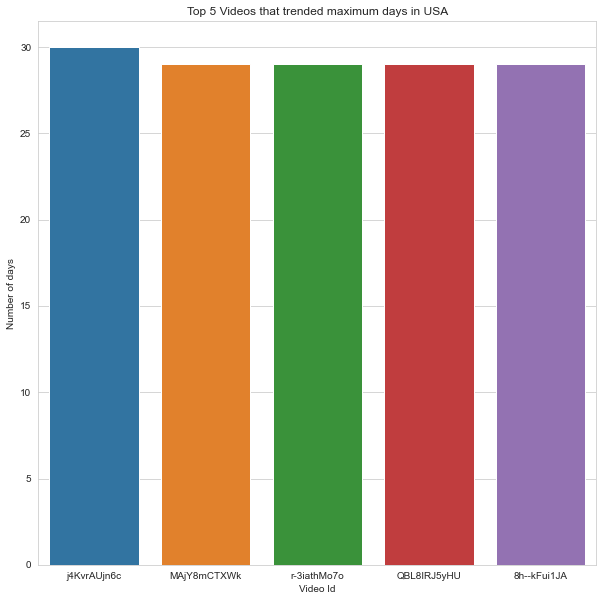

In [19]:
#TOP 5 Videos that trended maximum days from USA
df_usa_video_trended_maximum_days= df_usa.groupby('video_id')['title'].count().reset_index().sort_values(by='title',ascending=False).head(5)
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x=df_usa_video_trended_maximum_days['video_id'],y=df_usa_video_trended_maximum_days['title'], data=df_usa_video_trended_maximum_days)
plt.xlabel("Video Id")
plt.ylabel("Number of days")
plt.title("Top 5 Videos that trended maximum days in USA")

In [20]:
#Videos that trended only for a single day from USA
df_usa_single_day_trending=df_usa.drop_duplicates(subset='video_id', keep=False, inplace=False)
df_usa_single_day_trending.head()

video_id trending_date  \
10  9wRQljFNDW8    2017-11-14   
36  Om_zGhJLZ5U    2017-11-14   
41  goP4Z5wyOlM    2017-11-14   
55  8NHA23f7LvU    2017-11-14   
76  IE-xepGLVt8    2017-11-14   

                                                title           channel_title  \
10  Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...                     NFL   
36     TL;DW - Every DCEU Movie Before Justice League          Screen Junkies   
41  Iraq-Iran earthquake: Deadly tremor hits borde...                BBC News   
55  Jason Momoa Wows Hugh Grant With Some Dothraki...  The Graham Norton Show   
76  Mayo Clinic's first face transplant patient me...             Mayo Clinic   

   publish_date  category_id publish_time  \
10   2017-11-13           17     02:05:26   
36   2017-11-12            1     18:00:03   
41   2017-11-12           25     21:16:40   
55   2017-11-10           24     19:06:23   
76   2017-11-10           28     12:04:17   

                                                 tags    views  likes  \
10  NFL|"Football"|"offense"|"defense"|"afc"|"nfc"...    81377    655   
36  screenjunkies|"screen junkies"|"sj news"|"hone...   288922   7515   
41  bbc|"bbc news"|"news"|"iran"|"iran news"|"iraq...    34785    308   
55  Graham Norton|"Graham Norton Show Official"|"E...  1496225  16116   
76  Mayo Clinic|"Health Care (Issue)"|"Healthcare ...   237307   1896   

    dislikes  comment_count                                  thumbnail_link  \
10        25            177  https://i.ytimg.com/vi/9wRQljFNDW8/default.jpg   
36       792           2111  https://i.ytimg.com/vi/Om_zGhJLZ5U/default.jpg   
41        26            413  https://i.ytimg.com/vi/goP4Z5wyOlM/default.jpg   
55       236            605  https://i.ytimg.com/vi/8NHA23f7LvU/default.jpg   
76        74            260  https://i.ytimg.com/vi/IE-xepGLVt8/default.jpg   

    comments_disabled  ratings_disabled  video_error_or_removed  \
10              False             False                   False   
36              False             False                   False   
41              False             False                   False   
55              False             False                   False   
76              False             False                   False   

                                          description  
10  New England Patriots returner Dion Lewis blast...  
36  With Justice League approaching fast we rewatc...  
41  A strong 7.2-magnitude earthquake has rattled ...  
55  I think Sarah Millican was very excited for th...  
76  One and a half years after the surgery that tr...

Text(0.5, 1.0, 'Top 5 Trending Channel in USA')

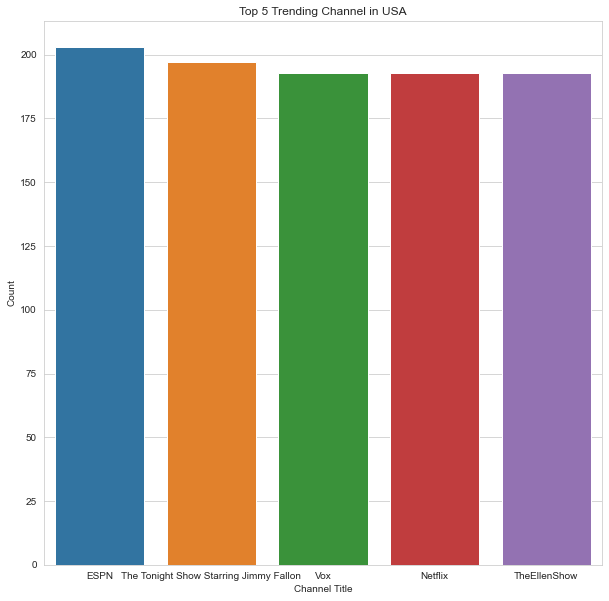

In [21]:
#TOP 5 Trending Channel in USA
usa_trending_channel=df_usa.groupby(by=['channel_title'],as_index=False).count().sort_values(by='title',ascending=False).head()
plt.figure(figsize=(10,10))
ax = sns.barplot(x=usa_trending_channel['channel_title'],y=usa_trending_channel['video_id'], data=usa_trending_channel)
plt.xlabel("Channel Title")
plt.ylabel("Count")
plt.title("Top 5 Trending Channel in USA")

Text(0.5, 1.0, 'Top 5 Least Trending Channel in USA')

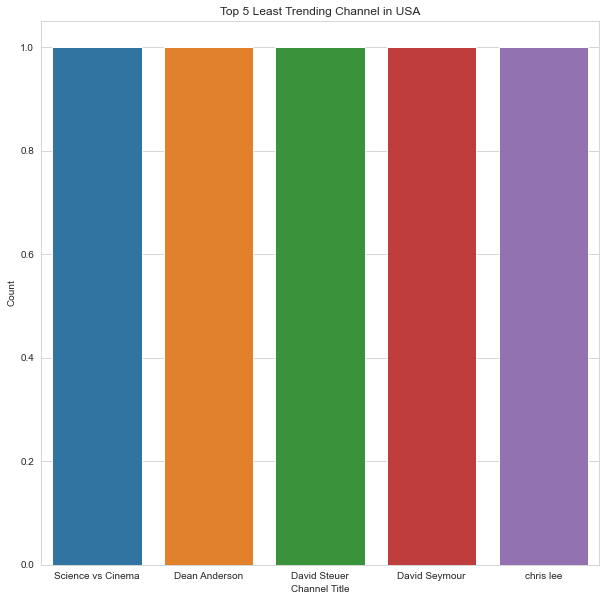

In [22]:
#TOP 5 Least Trending Channel in USA
usa_trending_channel=df_usa.groupby(by=['channel_title'],as_index=False).count().sort_values(by='title',ascending=True).head()
plt.figure(figsize=(10,10))
ax = sns.barplot(x=usa_trending_channel['channel_title'],y=usa_trending_channel['video_id'], data=usa_trending_channel)
plt.xlabel("Channel Title")
plt.ylabel("Count")
plt.title("Top 5 Least Trending Channel in USA")

Text(0.5, 1.0, 'Top 5 Category IDs for USA')

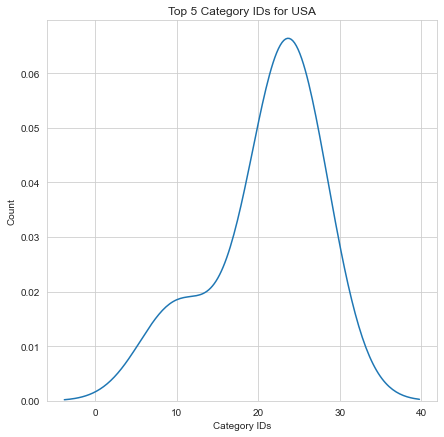

In [23]:
#Top 5 USA Category IDs
usa_category_id=df_usa.groupby(by=['category_id'],as_index=False).count().sort_values(by='title',ascending=False).head(5)
plt.figure(figsize=(7,7))
sns.kdeplot(usa_category_id['category_id']);
plt.xlabel("Category IDs")
plt.ylabel("Count")
plt.title("Top 5 Category IDs for USA")

In [24]:
#All category IDs in USA dataframe
df_usa['category_id'].unique()

array([22, 24, 23, 28,  1, 25, 17, 10, 15, 27, 26,  2, 19, 20, 29, 43],
      dtype=int64)

<AxesSubplot: xlabel='views', ylabel='likes'>

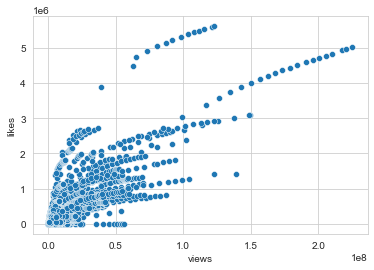

In [25]:
#scatterplot correlation between likes and views in USA dataframe
sns.scatterplot(x='views',y='likes', data=df_usa)

<AxesSubplot: xlabel='views', ylabel='dislikes'>

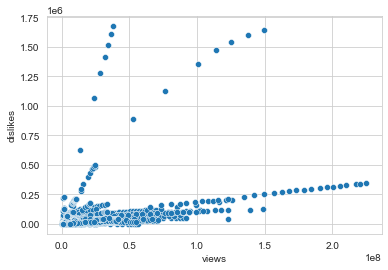

In [26]:
#scatterplot correlation between dislikes and views in USA dataframe
sns.scatterplot(x='views',y='dislikes', data=df_usa)

<AxesSubplot: xlabel='views', ylabel='comment_count'>

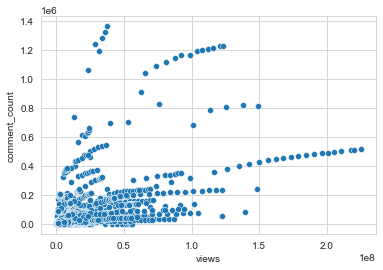

In [27]:
#scatterplot correlation between comment count and views in USA dataframe
sns.scatterplot(x='views',y='comment_count', data=df_usa)

<AxesSubplot: xlabel='likes', ylabel='comment_count'>

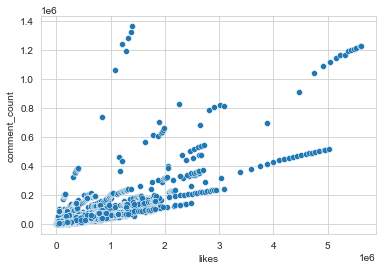

In [28]:
#scatterplot correlation between likes and comment_count in USA dataframe
sns.scatterplot(x='likes',y='comment_count', data=df_usa)

<AxesSubplot: xlabel='likes', ylabel='dislikes'>

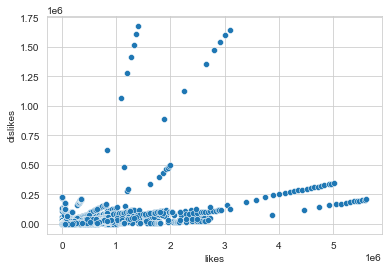

In [29]:
#scatterplot correlation between dislikes and likes in USA dataframe
sns.scatterplot(x='likes',y='dislikes', data=df_usa)

<AxesSubplot: xlabel='dislikes', ylabel='comment_count'>

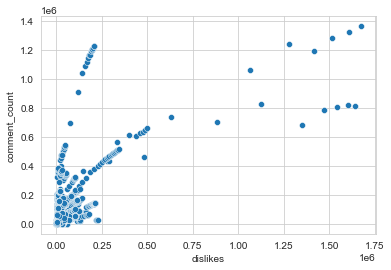

In [30]:
#scatterplot correlation between dislikes and comment_count in USA dataframe
sns.scatterplot(x='dislikes',y='comment_count', data=df_usa)

<AxesSubplot: xlabel='views', ylabel='description'>

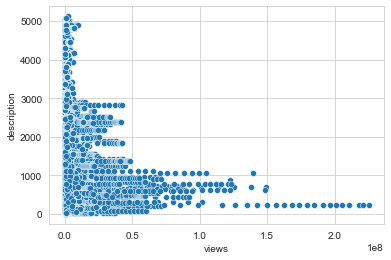

In [31]:
#scatterplot correlation between length of description and views in usa dataframe
sns.scatterplot(y=df_usa.description.apply(lambda x: len(str(x))),x=df_usa.views)
#no correlation found

<AxesSubplot: xlabel='views', ylabel='title'>

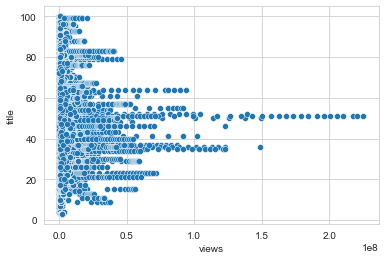

In [32]:
#scatterplot correlation between length of title and views in usa dataframe
sns.scatterplot(y=df_usa.title.apply(lambda x: len(str(x))),x=df_usa.views)
#no correlation found

# Sentimental Analysis - USA Dataframe

In [33]:
lm = WordNetLemmatizer()

In [34]:
def clean(text):
    text = str(text).lower()
    text = re.sub('[^a-z]',' ',str(text))
    text = text.split()
    text = [lm.lemmatize(j) for j in text if j not in set(stopwords.words('english'))]
    text = ' '.join(str(k) for k in text)
    return text

In [35]:
def subjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def polarity(text):
    return TextBlob(text).sentiment.polarity
def getanalysis(score):
    if score<0:
        return 'negative'
    elif score == 0:
        return 'neutral'
    elif score>0:
        return 'positive'

In [36]:
#Tile column polarity, subjectivity, analysis
titledata_usa = df_usa['title']
titledata_usa['cleantitle'] = titledata_usa.apply(clean)
titledata_usa['polarity'] = titledata_usa['cleantitle'].apply(polarity)
titledata_usa['subjectivity'] = titledata_usa['cleantitle'].apply(subjectivity)
titledata_usa['analysis'] = titledata_usa['polarity'].apply(getanalysis)

In [37]:
#Title Column polarity
titledata_usa['analysis'].value_counts()

neutral     23852
positive    11322
negative     5775
Name: title, dtype: int64

In [38]:
from wordcloud import WordCloud, STOPWORDS
def word_cloud(wd_list):
  stopwords = set(STOPWORDS)
  all_words = ' '.join([text for text in wd_list])
  wordcloud = WordCloud(background_color = 'white',stopwords = stopwords,width = 1000,height=900,max_words= 100,max_font_size=200).generate(all_words)
  plt.figure(figsize=(12,10))
  plt.imshow(wordcloud)

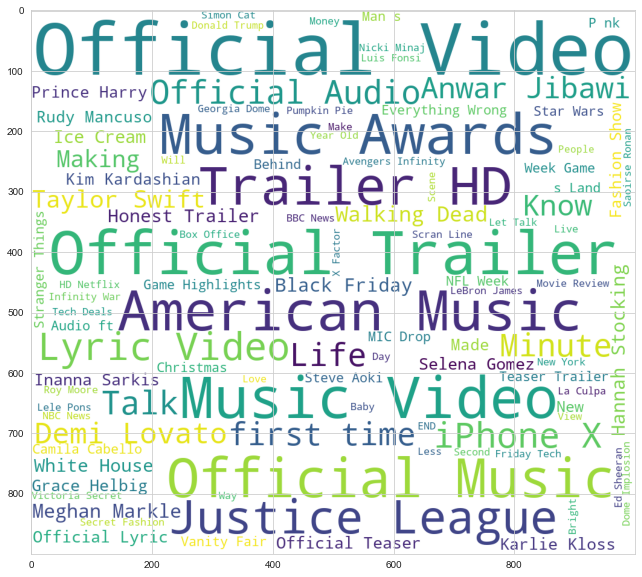

In [39]:
#WordCloud for Title Column
word_cloud(titledata_usa[:5000])

In [40]:
#Tags column polarity, subjectivity, analysis
tagsdata_usa = df_usa['tags']
tagsdata_usa['cleantags'] = tagsdata_usa.apply(clean)
tagsdata_usa['polarity'] = tagsdata_usa['cleantags'].apply(polarity)
tagsdata_usa['subjectivity'] = tagsdata_usa['cleantags'].apply(subjectivity)
tagsdata_usa['analysis'] = tagsdata_usa['polarity'].apply(getanalysis)

In [41]:
#Tags Column polarity
tagsdata_usa['analysis'].value_counts()

positive    20744
neutral     12072
negative     8133
Name: tags, dtype: int64

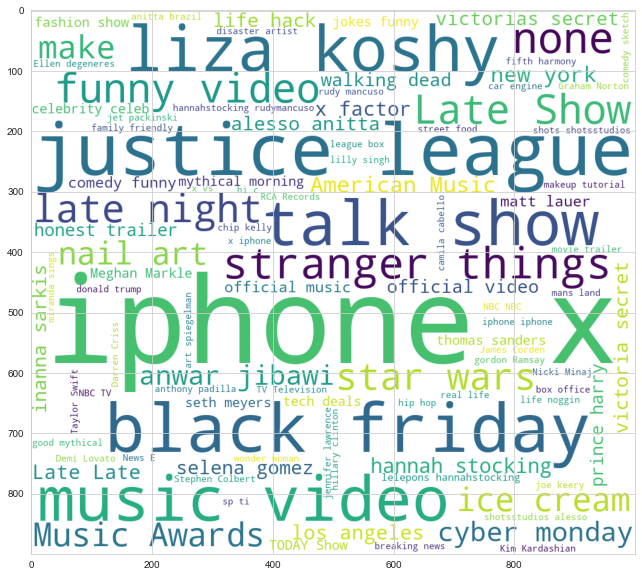

In [42]:
#WordCloud for Tags Column
word_cloud(tagsdata_usa[:5000])

In [43]:
#Description column polarity, subjectivity, analysis
descriptiondata_usa = df_usa['description']
descriptiondata_usa['cleandescription'] = descriptiondata_usa.apply(clean)
descriptiondata_usa['polarity'] = descriptiondata_usa['cleandescription'].apply(polarity)
descriptiondata_usa['subjectivity'] = descriptiondata_usa['cleandescription'].apply(subjectivity)
descriptiondata_usa['analysis'] = descriptiondata_usa['polarity'].apply(getanalysis)

In [44]:
#Description Column polarity
descriptiondata_usa['analysis'].value_counts()

positive    30397
negative     5792
neutral      4760
Name: description, dtype: int64

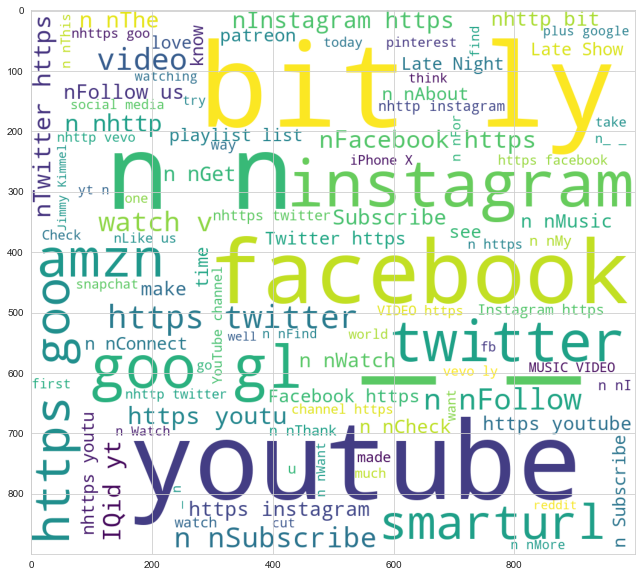

In [45]:
#WordCloud for Description Column
word_cloud(descriptiondata_usa[:5000])

# Youtube Video Likes Prediction - USA Dataframe

In [46]:
df_usa1 = df_usa.copy()

In [47]:
df_usa1['trending_date'] = pd.to_datetime(df_usa1['trending_date'], format='%y.%d.%m')

In [48]:
df_usa1['trending_month']= df_usa1['trending_date'].dt.month

In [49]:
labelencoder = LabelEncoder()
df_usa1['channel_no'] = labelencoder.fit_transform(df_usa1['channel_title'])
df_usa1

video_id trending_date  \
0      2kyS6SvSYSE    2017-11-14   
1      1ZAPwfrtAFY    2017-11-14   
2      5qpjK5DgCt4    2017-11-14   
3      puqaWrEC7tY    2017-11-14   
4      d380meD0W0M    2017-11-14   
...            ...           ...   
40944  BZt0qjTWNhw    2018-06-14   
40945  1h7KV2sjUWY    2018-06-14   
40946  D6Oy4LfoqsU    2018-06-14   
40947  oV0zkMe1K8s    2018-06-14   
40948  ooyjaVdt-jA    2018-06-14   

                                                   title  \
0                     WE WANT TO TALK ABOUT OUR MARRIAGE   
1      The Trump Presidency: Last Week Tonight with J...   
2      Racist Superman | Rudy Mancuso, King Bach & Le...   
3                       Nickelback Lyrics: Real or Fake?   
4                               I Dare You: GOING BALD!?   
...                                                  ...   
40944                       The Cat Who Caught the Laser   
40945                         True Facts : Ant Mutualism   
40946  I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...   
40947                How Black Panther Should Have Ended   
40948  Official Call of Duty®: Black Ops 4 — Multipla...   

                  channel_title publish_date  category_id publish_time  \
0                  CaseyNeistat   2017-11-13           22     17:13:01   
1               LastWeekTonight   2017-11-13           24     07:30:00   
2                  Rudy Mancuso   2017-11-12           23     19:05:24   
3         Good Mythical Morning   2017-11-13           24     11:00:04   
4                      nigahiga   2017-11-12           24     18:01:41   
...                         ...          ...          ...          ...   
40944             AaronsAnimals   2018-05-18           15     13:00:04   
40945                  zefrank1   2018-05-18           22     01:00:06   
40946                Brad Mondo   2018-05-18           24     17:34:22   
40947  How It Should Have Ended   2018-05-17            1     17:00:04   
40948              Call of Duty   2018-05-17           20     17:09:38   

                                                    tags     views   likes  \
0                                        SHANtell martin    748374   57527   
1      last week tonight trump presidency|"last week ...   2418783   97185   
2      racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434  146033   
3      rhett and link|"gmm"|"good mythical morning"|"...    343168   10172   
4      ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095731  132235   
...                                                  ...       ...     ...   
40944  aarons animals|"aarons"|"animals"|"cat"|"cats"...   1685609   38160   
40945                                             [none]   1064798   60008   
40946  I gave safiya nygaard a perfect hair makeover ...   1066451   48068   
40947  Black Panther|"HISHE"|"Marvel"|"Infinity War"|...   5660813  192957   
40948      call of duty|"cod"|"activision"|"Black Ops 4"  10306119  357079   

       dislikes  comment_count  \
0          2966          15954   
1          6146          12703   
2          5339           8181   
3           666           2146   
4          1989          17518   
...         ...            ...   
40944      1385           2657   
40945       382           3936   
40946      1032           3992   
40947      2846          13088   
40948    212976         144795   

                                       thumbnail_link  comments_disabled  \
0      https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg              False   
1      https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg              False   
2      https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg              False   
3      https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg              False   
4      https://i.ytimg.com/vi/d380meD0W0M/default.jpg              False   
...                                               ...                ...   
40944  https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg              False   
40945  https:

In [50]:
X1=df_usa1[['channel_no','trending_month','comment_count','dislikes','views']]
X1.head()

channel_no  trending_month  comment_count  dislikes    views
0         335              11          15954      2966   748374
1        1008              11          12703      6146  2418783
2        1499              11           8181      5339  3191434
3         706              11           2146       666   343168
4        2147              11          17518      1989  2095731

In [51]:
Y1=df_usa1["likes"]
Y1.head()

0     57527
1     97185
2    146033
3     10172
4    132235
Name: likes, dtype: int64

In [52]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=0.2)

In [53]:
len(X1_train), len(X1_test)

(32759, 8190)

In [54]:
transfer = StandardScaler()
X1_train = transfer.fit_transform(X1_train)
X1_test = transfer.transform(X1_test)

In [55]:
model = LinearRegression()
model.fit(X1_train,y1_train)

LinearRegression()

In [56]:
Y1_pred=model.predict(X1_test)
Y1_pred

array([  12375.29930744,   14914.79719298,   15727.33351788, ...,
          5886.32798774,  542912.40493246, 2031467.42632287])

In [57]:
LRScore = model.score(X1_test,y1_test)
print("Accuracy for Linear Regression:",LRScore*100)

Accuracy for Linear Regression: 87.64447122932998


In [58]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier()

In [59]:
model1.fit(X1_train[:2000],y1_train[:2000])

RandomForestClassifier()

In [60]:
Y1_pred_rf=model1.predict(X1_test)
Y1_pred_rf

array([    398,    7943,   11858, ...,      90,  578930, 2735382],
      dtype=int64)

In [61]:
RandomForestClassifierScore = model1.score(X1_test,y1_test)
print("Accuracy obtained for - Random Forest Classifier :",RandomForestClassifierScore*100)

Accuracy obtained for - Random Forest Classifier : 0.5982905982905984


# Exploratory Data Analysis - India Dataframe

In [62]:
df_india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37352 entries, 0 to 37351
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                37352 non-null  object
 1   trending_date           37352 non-null  object
 2   title                   37352 non-null  object
 3   channel_title           37352 non-null  object
 4   category_id             37352 non-null  int64 
 5   publish_time            37352 non-null  object
 6   tags                    37352 non-null  object
 7   views                   37352 non-null  int64 
 8   likes                   37352 non-null  int64 
 9   dislikes                37352 non-null  int64 
 10  comment_count           37352 non-null  int64 
 11  thumbnail_link          37352 non-null  object
 12  comments_disabled       37352 non-null  bool  
 13  ratings_disabled        37352 non-null  bool  
 14  video_error_or_removed  37352 non-null  bool  
 15  de

In [63]:
df_india

video_id trending_date  \
0      kzwfHumJyYc      17.14.11   
1      zUZ1z7FwLc8      17.14.11   
2      10L1hZ9qa58      17.14.11   
3      N1vE8iiEg64      17.14.11   
4      kJzGH0PVQHQ      17.14.11   
...            ...           ...   
37347  iNHecA3PJCo      18.14.06   
37348  dpPmPbhcslM      18.14.06   
37349  mV6aztP58f8      18.14.06   
37350  qxqDNP1bDEw      18.14.06   
37351  wERgpPK44w0      18.14.06   

                                                   title       channel_title  \
0      Sharry Mann: Cute Munda ( Song Teaser) | Parmi...     Lokdhun Punjabi   
1      पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...             HJ NEWS   
2      Stylish Star Allu Arjun @ ChaySam Wedding Rece...                TFPC   
3                         Eruma Saani | Tamil vs English         Eruma Saani   
4      why Samantha became EMOTIONAL @ Samantha naga ...          Filmylooks   
...                                                  ...                 ...   
37347  फेकू आशिक़ - राजस्थान की सबसे शानदार कॉमेडी | ...      RDC Rajasthani   
37348                         Seetha | Flowers | Ep# 364          Flowers TV   
37349  Bhramanam I Episode 87 - 12 June 2018 I Mazhav...   Mazhavil Manorama   
37350  Nua Bohu | Full Ep 285 | 13th June 2018 | Odia...           Tarang TV   
37351  Ee Nagaraniki Emaindi Trailer | Tharun Bhascke...  Suresh Productions   

       category_id              publish_time  \
0                1  2017-11-12T12:20:39.000Z   
1               25  2017-11-13T05:43:56.000Z   
2               24  2017-11-12T15:48:08.000Z   
3               23  2017-11-12T07:08:48.000Z   
4               24  2017-11-13T01:14:16.000Z   
...            ...                       ...   
37347           23  2018-06-13T08:01:11.000Z   
37348           24  2018-06-13T11:30:04.000Z   
37349           24  2018-06-13T05:00:02.000Z   
37350           24  2018-06-13T15:07:49.000Z   
37351           24  2018-06-10T04:29:54.000Z   

                                                    tags    views  likes  \
0      sharry mann|"sharry mann new song"|"sharry man...  1096327  33966   
1      पीरियड्स के समय|"पेट पर पति करता ऐसा"|"देखकर द...   590101    735   
2      Stylish Star Allu Arjun @ ChaySam Wedding Rece...   473988   2011   
3      Eruma Saani|"Tamil Comedy Videos"|"Films"|"Mov...  1242680  70353   
4      Filmylooks|"latest news"|"telugu movies"|"telu...   464015    492   
...                                                  ...      ...    ...   
37347  twinkle vaishnav comedy|"twinkle vaishnav"|"tw...   214378   3291   
37348  flowers serials|"actress"|"malayalam serials"|...   406828   1726   
37349  mazhavil manorama|"bhramanam full episode"|"gt...   386319   1216   
37350  tarang|"tarang tv"|"tarang tv online"|"tarang ...   130263    698   
37351  Ee Nagaraniki Emaindi|"Ee Nagaraniki Emaindi T...  1278249  22466   

       dislikes  comment_count  \
0           798            882   
1           904              0   
2           243            149   
3          1624           2684   
4           293             66   
...         ...            ...   
37347       404            196   
37348       478           1428   
37349       453            697   
37350       115             65   
37351      1609           1205   

                                       thumbnail_link  comments_disabled  \
0      https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg              False   
1      https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg               True   
2      https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg              False   
3      https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg              False   
4      https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg              False   
...                                               ...                ...   
37347  https://i.ytimg.com/vi/iNHecA3PJCo/default.jpg              False   
37348  https://i.ytimg.com/vi/dpPmPbhcslM/default.jpg              False   
37349  https://i.ytimg.com/vi/mV6

In [64]:
#Converting trending_date and publish_time columns to datetime datatype in India Dataframe
df_india['trending_date'] = pd.to_datetime(df_india['trending_date'], format='%y.%d.%m')
df_india['publish_time'] = pd.to_datetime(df_india['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [65]:
#Spilling publish_time column into publish_date and publish_time separate columns in India Dataframe
df_india.insert(4, 'publish_date', df_india['publish_time'].dt.date)
df_india['publish_time'] = df_india['publish_time'].dt.time
df_india['publish_date']=pd.to_datetime(df_usa['publish_date'])

In [66]:
#checking if any null values in India dataframe
df_india.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
publish_date                0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               561
dtype: int64

In [67]:
#Replacing null values with a string in India Dataframe
df_india.description = df_india.description.fillna('Description Not Found')

In [68]:
df_india

video_id trending_date  \
0      kzwfHumJyYc    2017-11-14   
1      zUZ1z7FwLc8    2017-11-14   
2      10L1hZ9qa58    2017-11-14   
3      N1vE8iiEg64    2017-11-14   
4      kJzGH0PVQHQ    2017-11-14   
...            ...           ...   
37347  iNHecA3PJCo    2018-06-14   
37348  dpPmPbhcslM    2018-06-14   
37349  mV6aztP58f8    2018-06-14   
37350  qxqDNP1bDEw    2018-06-14   
37351  wERgpPK44w0    2018-06-14   

                                                   title       channel_title  \
0      Sharry Mann: Cute Munda ( Song Teaser) | Parmi...     Lokdhun Punjabi   
1      पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...             HJ NEWS   
2      Stylish Star Allu Arjun @ ChaySam Wedding Rece...                TFPC   
3                         Eruma Saani | Tamil vs English         Eruma Saani   
4      why Samantha became EMOTIONAL @ Samantha naga ...          Filmylooks   
...                                                  ...                 ...   
37347  फेकू आशिक़ - राजस्थान की सबसे शानदार कॉमेडी | ...      RDC Rajasthani   
37348                         Seetha | Flowers | Ep# 364          Flowers TV   
37349  Bhramanam I Episode 87 - 12 June 2018 I Mazhav...   Mazhavil Manorama   
37350  Nua Bohu | Full Ep 285 | 13th June 2018 | Odia...           Tarang TV   
37351  Ee Nagaraniki Emaindi Trailer | Tharun Bhascke...  Suresh Productions   

      publish_date  category_id publish_time  \
0       2017-11-13            1     12:20:39   
1       2017-11-13           25     05:43:56   
2       2017-11-12           24     15:48:08   
3       2017-11-13           23     07:08:48   
4       2017-11-12           24     01:14:16   
...            ...          ...          ...   
37347   2018-05-05           23     08:01:11   
37348   2018-05-04           24     11:30:04   
37349   2018-05-27           24     05:00:02   
37350   2018-05-27           24     15:07:49   
37351   2018-05-27           24     04:29:54   

                                                    tags    views  likes  \
0      sharry mann|"sharry mann new song"|"sharry man...  1096327  33966   
1      पीरियड्स के समय|"पेट पर पति करता ऐसा"|"देखकर द...   590101    735   
2      Stylish Star Allu Arjun @ ChaySam Wedding Rece...   473988   2011   
3      Eruma Saani|"Tamil Comedy Videos"|"Films"|"Mov...  1242680  70353   
4      Filmylooks|"latest news"|"telugu movies"|"telu...   464015    492   
...                                                  ...      ...    ...   
37347  twinkle vaishnav comedy|"twinkle vaishnav"|"tw...   214378   3291   
37348  flowers serials|"actress"|"malayalam serials"|...   406828   1726   
37349  mazhavil manorama|"bhramanam full episode"|"gt...   386319   1216   
37350  tarang|"tarang tv"|"tarang tv online"|"tarang ...   130263    698   
37351  Ee Nagaraniki Emaindi|"Ee Nagaraniki Emaindi T...  1278249  22466   

       dislikes  comment_count  \
0           798            882   
1           904              0   
2           243            149   
3          1624           2684   
4           293             66   
...         ...            ...   
37347       404            196   
37348       478           1428   
37349       453            697   
37350       115             65   
37351      1609           1205   

                                       thumbnail_link  comments_disabled  \
0      https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg              False   
1      https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg               True   
2      https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg              False   
3      https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg              False   
4      https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg              False   
...                                               ...                ...   
37347  https://i.ytimg.com/vi/iNHecA3PJCo/default.jpg              False   
37348  https://i.ytimg.com/vi/dpPmPbhcslM/default.jpg              False   
37349  https://i.ytimg.com/vi/mV6

In [69]:
#checking if any null values in India dataframe
df_usa.isnull().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
publish_date              0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
dtype: int64

In [70]:
#Top 10 channels with most total views on trending videos from India
df_india.groupby('channel_title')['views'].sum().reset_index().sort_values(by='views',ascending=False).head(10)

channel_title       views
1052                     T-Series  2124607907
631          Marvel Entertainment  1280396202
356                  FoxStarHindi  1260807619
78                   Amit Bhadana  1024252169
1019                Speed Records   801739414
1013  Sony Pictures Entertainment   772261898
1353            Zee Music Company   694640267
394           Goldmines Telefilms   643826504
288                  Dude Perfect   598578613
1333                          YRF   573884674

In [71]:
#Top 10 channels with least total views on trending videos from India
df_india.groupby('channel_title')['views'].sum().reset_index().sort_values(by='views',ascending=True).head(10)

channel_title  views
740                              News VIdeo   7573
1315                    Wide Angle Pictures  11337
1282                         Viral in India  11391
894                            Reporter Roy  11816
795                                 Pakkatv  13443
816                            Pooja Luthra  14155
998          Skylark Pictures Entertainment  14752
1001                           Smart Series  15314
584                                    MFIP  16137
1104  Tamil News World - தமிழ் செய்தி உலகம்  16336

In [72]:
#Top 10 channels with most total likes on trending videos from India
df_india.groupby('channel_title')['likes'].sum().reset_index().sort_values(by='likes',ascending=False).head(10)

channel_title     likes
78               Amit Bhadana  62418215
631      Marvel Entertainment  41533846
1052                 T-Series  38685572
1366  ashish chanchlani vines  33988735
118               BB Ki Vines  33846035
809                 PewDiePie  25060931
356              FoxStarHindi  24667616
288              Dude Perfect  23699360
1019            Speed Records  21578200
1126          TaylorSwiftVEVO  19180465

In [73]:
#Top 10 channels with most total dislikes on trending videos from India
df_india.groupby('channel_title')['dislikes'].sum().reset_index().sort_values(by='dislikes',ascending=False).head(10)

channel_title  dislikes
1339        YouTube Spotlight   6865746
1052                 T-Series   2650896
1198            Tips Official   2370526
78               Amit Bhadana   2305446
949         Salman Khan Films   1294276
1019            Speed Records   1078027
1324        Wunderbar Studios   1065637
1011         Sony Music India   1051493
1126          TaylorSwiftVEVO   1025100
1366  ashish chanchlani vines    996013

In [74]:
#Top 10 channels with most total comments on trending videos from India
df_india.groupby('channel_title')['comment_count'].sum().reset_index().sort_values(by='comment_count',ascending=False).head(10)

channel_title  comment_count
1130             Technical Guruji        8429895
78                   Amit Bhadana        6498348
631          Marvel Entertainment        5038160
1339            YouTube Spotlight        4270117
118                   BB Ki Vines        3105902
809                     PewDiePie        2939794
1052                     T-Series        2630665
1366      ashish chanchlani vines        2376759
1013  Sony Pictures Entertainment        2106922
356                  FoxStarHindi        1795968

In [75]:
#Videos that trended only for a single day from India
df_india_single_day_trending=df_india.drop_duplicates(subset='video_id', keep=False, inplace=False)
df_india_single_day_trending.head()

video_id trending_date  \
12  Prb_osSVE0M    2017-11-14   
22  1kuJkA9usqg    2017-11-14   
24  znOC3IU0dF8    2017-11-14   
25  z3V9LUA6VQM    2017-11-14   
31  gW4Su5wq0b8    2017-11-14   

                                                title     channel_title  \
12  Renu Desai Gives Rating For Pawan kalyan As Hu...        ABN Telugu   
22                  Deivamagal Episode 1387, 13/11/17         VikatanTV   
24  Hero Tarun at #ChaySamWeddingReception | Saman...       News Mantra   
25  ఆమె బ్యాంకు అకౌంట్ లో పొరపాటున 125 కోట్లు జమయా...             OmFut   
31         Neeya Naana - 12th November 2017 - Promo 2  Vijay Television   

   publish_date  category_id publish_time  \
12   2017-11-13           25     09:51:59   
22   2017-11-13           24     15:00:01   
24   2017-11-13           24     06:03:49   
25   2017-11-12           24     09:45:58   
31   2017-11-06           24     07:49:46   

                                                 tags   views  likes  \
12  Resnu desai|"actress renu desai"|"pawan kalyan...  156085    716   
22  deivamagal|"deiva magal"|"deiva magal serial"|...  387221   2159   
24  Hero Tarun At Samantha Naga Chaitanya Wedding ...   55178     45   
25                                             [none]  236710    858   
31  Neeya Naana|"NN"|"Gopinath"|"Men Vs Women Seri...  261202   1971   

    dislikes  comment_count                                  thumbnail_link  \
12        53              0  https://i.ytimg.com/vi/Prb_osSVE0M/default.jpg   
22      1214            711  https://i.ytimg.com/vi/1kuJkA9usqg/default.jpg   
24        94             15  https://i.ytimg.com/vi/znOC3IU0dF8/default.jpg   
25       197             66  https://i.ytimg.com/vi/z3V9LUA6VQM/default.jpg   
31       126            201  https://i.ytimg.com/vi/gW4Su5wq0b8/default.jpg   

    comments_disabled  ratings_disabled  video_error_or_removed  \
12               True             False                   False   
22              False             False                   False   
24              False             False                   False   
25              False             False                   False   
31              False             False                   False   

                                          description  
12  Renu Desai gives a low rating for Pawan Kalyan...  
22  Deivamagal Episode 1387\nSubscribe: https://go...  
24                              Description Not Found  
25                              Description Not Found  
31  #நீயாநானா  | ஞாயிறு மதியம் 3 மணிக்கு உங்கள் வி...

Text(0.5, 1.0, 'Top 5 Trending Channel in India')

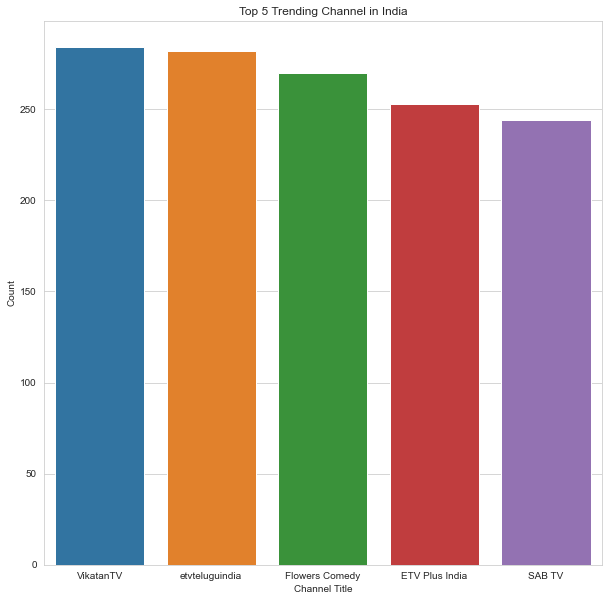

In [76]:
#TOP 5 Trending Channel in India
india_trending_channel=df_india.groupby(by=['channel_title'],as_index=False).count().sort_values(by='title',ascending=False).head()
plt.figure(figsize=(10,10))
ax = sns.barplot(x=india_trending_channel['channel_title'],y=india_trending_channel['video_id'], data=usa_trending_channel)
plt.xlabel("Channel Title")
plt.ylabel("Count")
plt.title("Top 5 Trending Channel in India")

Text(0.5, 1.0, 'Top 5 Category IDs for India')

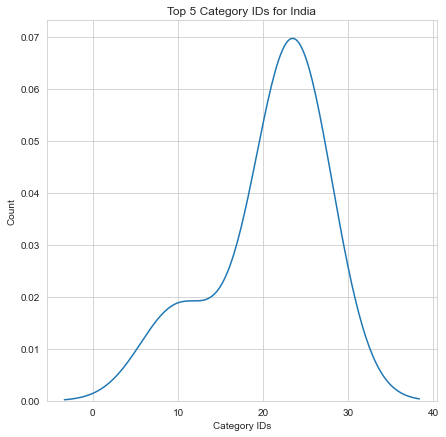

In [77]:
#Top 5 India Category IDs
india_category_id=df_india.groupby(by=['category_id'],as_index=False).count().sort_values(by='title',ascending=False).head(5)
plt.figure(figsize=(7,7))
sns.kdeplot(india_category_id['category_id']);
plt.xlabel("Category IDs")
plt.ylabel("Count")
plt.title("Top 5 Category IDs for India")

<AxesSubplot: xlabel='views', ylabel='likes'>

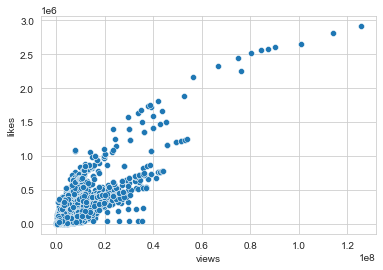

In [78]:
#scatterplot correlation between likes and views in India dataframe
sns.scatterplot(x='views',y='likes', data=df_india)

<AxesSubplot: xlabel='views', ylabel='dislikes'>

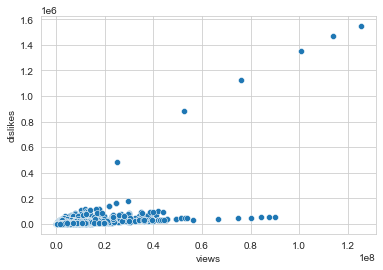

In [79]:
#scatterplot correlation between dislikes and views in India dataframe
sns.scatterplot(x='views',y='dislikes', data=df_india)

<AxesSubplot: xlabel='views', ylabel='comment_count'>

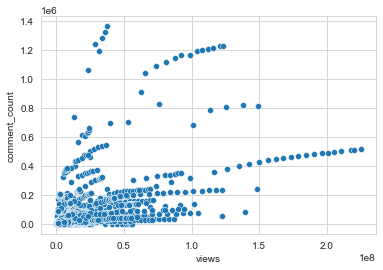

In [80]:
#scatterplot correlation between comment count and views in India dataframe
sns.scatterplot(x='views',y='comment_count', data=df_usa)

<AxesSubplot: xlabel='likes', ylabel='comment_count'>

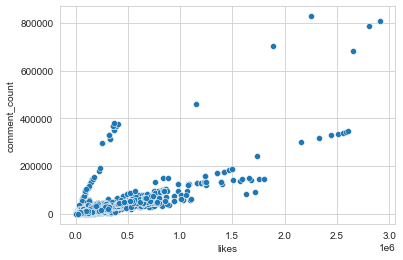

In [81]:
#scatterplot correlation between likes and comment_count in India dataframe
sns.scatterplot(x='likes',y='comment_count', data=df_india)

<AxesSubplot: xlabel='likes', ylabel='dislikes'>

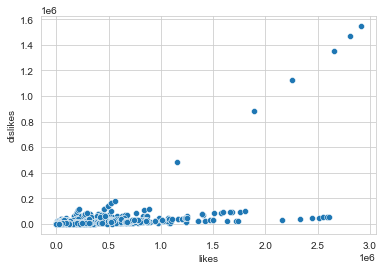

In [82]:
#scatterplot correlation between dislikes and likes in India dataframe
sns.scatterplot(x='likes',y='dislikes', data=df_india)

<AxesSubplot: xlabel='dislikes', ylabel='comment_count'>

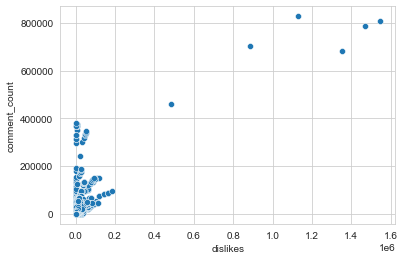

In [83]:
#scatterplot correlation between dislikes and comment count in India dataframe
sns.scatterplot(x='dislikes',y='comment_count', data=df_india)

<AxesSubplot: xlabel='views', ylabel='description'>

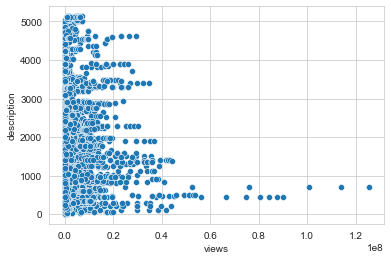

In [84]:
#scatterplot correlation between length of description and views in India dataframe
sns.scatterplot(y=df_india.description.apply(lambda x: len(str(x))),x=df_india.views)
#no correlation found

<AxesSubplot: xlabel='views', ylabel='title'>

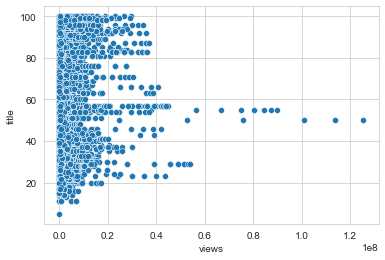

In [85]:
#scatterplot correlation between length of title and views in India dataframe
sns.scatterplot(y=df_india.title.apply(lambda x: len(str(x))),x=df_india.views)
#no correlation found

In [86]:
#All category IDs in USA dataframe
df_india['category_id'].unique()

array([ 1, 25, 24, 23, 10, 22, 19, 28, 27, 26, 43, 17, 29,  2, 15, 20, 30],
      dtype=int64)

# Sentimental - India Dataframe

In [87]:
lm = WordNetLemmatizer()

In [88]:
def clean(text):
    text = str(text).lower()
    text = re.sub('[^a-z]',' ',str(text))
    text = text.split()
    text = [lm.lemmatize(j) for j in text if j not in set(stopwords.words('english'))]
    text = ' '.join(str(k) for k in text)
    return text

In [89]:
def subjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def polarity(text):
    return TextBlob(text).sentiment.polarity
def getanalysis(score):
    if score<0:
        return 'negative'
    elif score == 0:
        return 'neutral'
    elif score>0:
        return 'positive'

In [90]:
#Title column polarity, subjectivity, analysis - India dataframe
titledata_india = df_india['title']
titledata_india['cleantitle'] = titledata_india.apply(clean)
titledata_india['polarity'] = titledata_india['cleantitle'].apply(polarity)
titledata_india['subjectivity'] = titledata_india['cleantitle'].apply(subjectivity)
titledata_india['analysis'] = titledata_india['polarity'].apply(getanalysis)

In [91]:
#Title Column polarity - India Dataframe
titledata_india['analysis'].value_counts()

neutral     24219
positive    10390
negative     2743
Name: title, dtype: int64

In [92]:
#Tags column polarity, subjectivity, analysis - India dataframe
tagsdata_india = df_india['tags']
tagsdata_india['cleantitle'] = tagsdata_india.apply(clean)
tagsdata_india['polarity'] = tagsdata_india['cleantitle'].apply(polarity)
tagsdata_india['subjectivity'] = tagsdata_india['cleantitle'].apply(subjectivity)
tagsdata_india['analysis'] = tagsdata_india['polarity'].apply(getanalysis)

In [93]:
#Tags Column polarity - India Dataframe
tagsdata_india['analysis'].value_counts()

positive    26229
neutral      8434
negative     2689
Name: tags, dtype: int64

In [94]:
#Description column polarity, subjectivity, analysis - India dataframe
descriptiondata_india = df_india['tags']
descriptiondata_india['cleantitle'] = descriptiondata_india.apply(clean)
descriptiondata_india['polarity'] = descriptiondata_india['cleantitle'].apply(polarity)
descriptiondata_india['subjectivity'] = descriptiondata_india['cleantitle'].apply(subjectivity)
descriptiondata_india['analysis'] = descriptiondata_india['polarity'].apply(getanalysis)

In [95]:
#Description Column polarity - India Dataframe
descriptiondata_india['analysis'].value_counts()

positive    26229
neutral      8434
negative     2689
Name: tags, dtype: int64

# Youtube Video Likes Prediction - India Dataframe

In [96]:
df_india1 = df_india.copy()

In [97]:
df_india1['trending_date'] = pd.to_datetime(df_india1['trending_date'], format='%y.%d.%m')

In [98]:
df_india1['trending_month']= df_india1['trending_date'].dt.month

In [99]:
labelencoder = LabelEncoder()
df_india1['channel_no'] = labelencoder.fit_transform(df_india1['channel_title'])
df_india1

video_id trending_date  \
0      kzwfHumJyYc    2017-11-14   
1      zUZ1z7FwLc8    2017-11-14   
2      10L1hZ9qa58    2017-11-14   
3      N1vE8iiEg64    2017-11-14   
4      kJzGH0PVQHQ    2017-11-14   
...            ...           ...   
37347  iNHecA3PJCo    2018-06-14   
37348  dpPmPbhcslM    2018-06-14   
37349  mV6aztP58f8    2018-06-14   
37350  qxqDNP1bDEw    2018-06-14   
37351  wERgpPK44w0    2018-06-14   

                                                   title       channel_title  \
0      Sharry Mann: Cute Munda ( Song Teaser) | Parmi...     Lokdhun Punjabi   
1      पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...             HJ NEWS   
2      Stylish Star Allu Arjun @ ChaySam Wedding Rece...                TFPC   
3                         Eruma Saani | Tamil vs English         Eruma Saani   
4      why Samantha became EMOTIONAL @ Samantha naga ...          Filmylooks   
...                                                  ...                 ...   
37347  फेकू आशिक़ - राजस्थान की सबसे शानदार कॉमेडी | ...      RDC Rajasthani   
37348                         Seetha | Flowers | Ep# 364          Flowers TV   
37349  Bhramanam I Episode 87 - 12 June 2018 I Mazhav...   Mazhavil Manorama   
37350  Nua Bohu | Full Ep 285 | 13th June 2018 | Odia...           Tarang TV   
37351  Ee Nagaraniki Emaindi Trailer | Tharun Bhascke...  Suresh Productions   

      publish_date  category_id publish_time  \
0       2017-11-13            1     12:20:39   
1       2017-11-13           25     05:43:56   
2       2017-11-12           24     15:48:08   
3       2017-11-13           23     07:08:48   
4       2017-11-12           24     01:14:16   
...            ...          ...          ...   
37347   2018-05-05           23     08:01:11   
37348   2018-05-04           24     11:30:04   
37349   2018-05-27           24     05:00:02   
37350   2018-05-27           24     15:07:49   
37351   2018-05-27           24     04:29:54   

                                                    tags    views  likes  \
0      sharry mann|"sharry mann new song"|"sharry man...  1096327  33966   
1      पीरियड्स के समय|"पेट पर पति करता ऐसा"|"देखकर द...   590101    735   
2      Stylish Star Allu Arjun @ ChaySam Wedding Rece...   473988   2011   
3      Eruma Saani|"Tamil Comedy Videos"|"Films"|"Mov...  1242680  70353   
4      Filmylooks|"latest news"|"telugu movies"|"telu...   464015    492   
...                                                  ...      ...    ...   
37347  twinkle vaishnav comedy|"twinkle vaishnav"|"tw...   214378   3291   
37348  flowers serials|"actress"|"malayalam serials"|...   406828   1726   
37349  mazhavil manorama|"bhramanam full episode"|"gt...   386319   1216   
37350  tarang|"tarang tv"|"tarang tv online"|"tarang ...   130263    698   
37351  Ee Nagaraniki Emaindi|"Ee Nagaraniki Emaindi T...  1278249  22466   

       dislikes  comment_count  \
0           798            882   
1           904              0   
2           243            149   
3          1624           2684   
4           293             66   
...         ...            ...   
37347       404            196   
37348       478           1428   
37349       453            697   
37350       115             65   
37351      1609           1205   

                                       thumbnail_link  comments_disabled  \
0      https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg              False   
1      https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg               True   
2      https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg              False   
3      https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg              False   
4      https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg              False   
...                                               ...                ...   
37347  https://i.ytimg.com/vi/iNHecA3PJCo/default.jpg              False   
37348  https://i.ytimg.com/vi/dpPmPbhcslM/default.jpg              False   
37349  https://i.ytimg.com/vi/mV6

In [100]:
X2=df_india1[['channel_no','trending_month','comment_count','dislikes','views']]
X2.head()

channel_no  trending_month  comment_count  dislikes    views
0         574              11            882       798  1096327
1         411              11              0       904   590101
2        1066              11            149       243   473988
3         316              11           2684      1624  1242680
4         348              11             66       293   464015

In [101]:
Y2=df_india1["likes"]
Y2.head()

0    33966
1      735
2     2011
3    70353
4      492
Name: likes, dtype: int64

In [102]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size=0.2)

In [103]:
len(X2_train), len(X2_test)

(29881, 7471)

In [104]:
transfer = StandardScaler()
X2_train = transfer.fit_transform(X2_train)
X2_test = transfer.transform(X2_test)

In [105]:
model2 = LinearRegression()
model2.fit(X2_train,y2_train)

LinearRegression()

In [106]:
Y2_pred=model2.predict(X2_test)
Y2_pred

array([40865.58573003,  4254.07827501, 10157.68768174, ...,
        4580.30273855, -1721.71101359, 22260.41127513])

In [107]:
LRScore1 = model2.score(X2_test,y2_test)
print("Accuracy for Linear Regression:",LRScore*100)

Accuracy for Linear Regression: 87.64447122932998


In [108]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()

In [109]:
model3.fit(X2_train[:2000],y2_train[:2000])

RandomForestClassifier()

In [111]:
Y2_pred_rf=model3.predict(X2_test)
Y2_pred_rf

array([ 3231,   682, 17396, ...,   294,   873,  9838], dtype=int64)

In [112]:
RandomForestClassifierScore = model3.score(X2_test,y2_test)
print("Accuracy obtained for - Random Forest Classifier :",RandomForestClassifierScore*100)

Accuracy obtained for - Random Forest Classifier : 3.2391915406237453


# Exploratory Data Analysis - Canada Dataframe

In [113]:
#Importing Canada Dataset
df_canada = pd.read_csv("CAvideos.csv")

In [114]:
#Canada Dataframe Info
df_canada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40881 non-null  object
 1   trending_date           40881 non-null  object
 2   title                   40881 non-null  object
 3   channel_title           40881 non-null  object
 4   category_id             40881 non-null  int64 
 5   publish_time            40881 non-null  object
 6   tags                    40881 non-null  object
 7   views                   40881 non-null  int64 
 8   likes                   40881 non-null  int64 
 9   dislikes                40881 non-null  int64 
 10  comment_count           40881 non-null  int64 
 11  thumbnail_link          40881 non-null  object
 12  comments_disabled       40881 non-null  bool  
 13  ratings_disabled        40881 non-null  bool  
 14  video_error_or_removed  40881 non-null  bool  
 15  de

In [115]:
df_canada

video_id trending_date  \
0      n1WpP7iowLc      17.14.11   
1      0dBIkQ4Mz1M      17.14.11   
2      5qpjK5DgCt4      17.14.11   
3      d380meD0W0M      17.14.11   
4      2Vv-BfVoq4g      17.14.11   
...            ...           ...   
40876  sGolxsMSGfQ      18.14.06   
40877  8HNuRNi8t70      18.14.06   
40878  GWlKEM3m2EE      18.14.06   
40879  lbMKLzQ4cNQ      18.14.06   
40880  POTgw38-m58      18.14.06   

                                                   title     channel_title  \
0             Eminem - Walk On Water (Audio) ft. Beyoncé        EminemVEVO   
1                          PLUSH - Bad Unboxing Fan Mail         iDubbbzTV   
2      Racist Superman | Rudy Mancuso, King Bach & Le...      Rudy Mancuso   
3                               I Dare You: GOING BALD!?          nigahiga   
4            Ed Sheeran - Perfect (Official Music Video)        Ed Sheeran   
...                                                  ...               ...   
40876                       HOW2: How to Solve a Mystery   Annoying Orange   
40877                   Eli Lik Lik Episode 13 Partie 01  Elhiwar Ettounsi   
40878  KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...    Kingdom Hearts   
40879                   Trump Advisor Grovels To Trudeau   The Young Turks   
40880                   【完整版】遇到恐怖情人該怎麼辦？2018.06.13小明星大跟班          我愛小明星大跟班   

       category_id              publish_time  \
0               10  2017-11-10T17:00:03.000Z   
1               23  2017-11-13T17:00:00.000Z   
2               23  2017-11-12T19:05:24.000Z   
3               24  2017-11-12T18:01:41.000Z   
4               10  2017-11-09T11:04:14.000Z   
...            ...                       ...   
40876           24  2018-06-13T18:00:07.000Z   
40877           24  2018-06-13T19:01:18.000Z   
40878           20  2018-06-11T17:30:53.000Z   
40879           25  2018-06-13T04:00:05.000Z   
40880           24  2018-06-13T16:00:03.000Z   

                                                    tags     views    likes  \
0      Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1      plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2      racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3      ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4      edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   
...                                                  ...       ...      ...   
40876  annoying orange|"funny"|"fruit"|"talking"|"ani...     80685     1701   
40877  hkayet tounsia|"elhiwar ettounsi"|"denya okhra...    103339      460   
40878  Kingdom Hearts|"KH3"|"Kingdom Hearts 3"|"Froze...    773347    25900   
40879  180612__TB02SorryExcuse|"News"|"Politics"|"The...    115225     2115   
40880  吳宗憲|"吳姍儒"|"小明星大跟班"|"Sandy"|"Jacky wu"|"憲哥"|"中天...    107392      300   

       dislikes  comment_count  \
0         43420         125882   
1          1688          13030   
2          5339           8181   
3          1989          17518   
4         21082          85067   
...         ...            ...   
40876        99           1312   
40877        66             51   
40878       224           3881   
40879       182           1672   
40880        62            251   

                                       thumbnail_link  comments_disabled  \
0      https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg              False   
1      https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg              False   
2      https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg              False   
3      https://i.ytimg.com/vi/d380meD0W0M/default.jpg              False   
4      https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg              False   
...                                               ...                ...   
40876  https://i.ytimg.com/vi/sGolxsMSGfQ/default.jpg              False   
40877  https://i.ytimg.com/vi/8HNuRNi8t70/default.jpg              False   
40878  https://i.ytim

In [116]:
#Converting trending_date and publish_time columns to datetime datatype in Canada Dataframe
df_canada['trending_date'] = pd.to_datetime(df_canada['trending_date'], format='%y.%d.%m')
df_canada['publish_time'] = pd.to_datetime(df_canada['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [117]:
#Spilling publish_time column into publish_date and publish_time separate columns in USA Dataframe
df_canada.insert(4, 'publish_date', df_canada['publish_time'].dt.date)
df_canada['publish_time'] = df_canada['publish_time'].dt.time
df_canada['publish_date']=pd.to_datetime(df_canada['publish_date'])

In [118]:
#Canada Dataframe Info
df_canada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                40881 non-null  object        
 1   trending_date           40881 non-null  datetime64[ns]
 2   title                   40881 non-null  object        
 3   channel_title           40881 non-null  object        
 4   publish_date            40881 non-null  datetime64[ns]
 5   category_id             40881 non-null  int64         
 6   publish_time            40881 non-null  object        
 7   tags                    40881 non-null  object        
 8   views                   40881 non-null  int64         
 9   likes                   40881 non-null  int64         
 10  dislikes                40881 non-null  int64         
 11  comment_count           40881 non-null  int64         
 12  thumbnail_link          40881 non-null  object

In [119]:
#checking if any null values in Canada dataframe
df_canada.isnull().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
publish_date                 0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1296
dtype: int64

In [120]:
#Replacing null values with a string in Canada Dataframe
df_canada.description = df_canada.description.fillna('Description Not Found')

In [121]:
df_canada

video_id trending_date  \
0      n1WpP7iowLc    2017-11-14   
1      0dBIkQ4Mz1M    2017-11-14   
2      5qpjK5DgCt4    2017-11-14   
3      d380meD0W0M    2017-11-14   
4      2Vv-BfVoq4g    2017-11-14   
...            ...           ...   
40876  sGolxsMSGfQ    2018-06-14   
40877  8HNuRNi8t70    2018-06-14   
40878  GWlKEM3m2EE    2018-06-14   
40879  lbMKLzQ4cNQ    2018-06-14   
40880  POTgw38-m58    2018-06-14   

                                                   title     channel_title  \
0             Eminem - Walk On Water (Audio) ft. Beyoncé        EminemVEVO   
1                          PLUSH - Bad Unboxing Fan Mail         iDubbbzTV   
2      Racist Superman | Rudy Mancuso, King Bach & Le...      Rudy Mancuso   
3                               I Dare You: GOING BALD!?          nigahiga   
4            Ed Sheeran - Perfect (Official Music Video)        Ed Sheeran   
...                                                  ...               ...   
40876                       HOW2: How to Solve a Mystery   Annoying Orange   
40877                   Eli Lik Lik Episode 13 Partie 01  Elhiwar Ettounsi   
40878  KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...    Kingdom Hearts   
40879                   Trump Advisor Grovels To Trudeau   The Young Turks   
40880                   【完整版】遇到恐怖情人該怎麼辦？2018.06.13小明星大跟班          我愛小明星大跟班   

      publish_date  category_id publish_time  \
0       2017-11-10           10     17:00:03   
1       2017-11-13           23     17:00:00   
2       2017-11-12           23     19:05:24   
3       2017-11-12           24     18:01:41   
4       2017-11-09           10     11:04:14   
...            ...          ...          ...   
40876   2018-06-13           24     18:00:07   
40877   2018-06-13           24     19:01:18   
40878   2018-06-11           20     17:30:53   
40879   2018-06-13           25     04:00:05   
40880   2018-06-13           24     16:00:03   

                                                    tags     views    likes  \
0      Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1      plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2      racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3      ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4      edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   
...                                                  ...       ...      ...   
40876  annoying orange|"funny"|"fruit"|"talking"|"ani...     80685     1701   
40877  hkayet tounsia|"elhiwar ettounsi"|"denya okhra...    103339      460   
40878  Kingdom Hearts|"KH3"|"Kingdom Hearts 3"|"Froze...    773347    25900   
40879  180612__TB02SorryExcuse|"News"|"Politics"|"The...    115225     2115   
40880  吳宗憲|"吳姍儒"|"小明星大跟班"|"Sandy"|"Jacky wu"|"憲哥"|"中天...    107392      300   

       dislikes  comment_count  \
0         43420         125882   
1          1688          13030   
2          5339           8181   
3          1989          17518   
4         21082          85067   
...         ...            ...   
40876        99           1312   
40877        66             51   
40878       224           3881   
40879       182           1672   
40880        62            251   

                                       thumbnail_link  comments_disabled  \
0      https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg              False   
1      https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg              False   
2      https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg              False   
3      https://i.ytimg.com/vi/d380meD0W0M/default.jpg              False   
4      https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg              False   
...                                               ...                ...   
40876  https://i.ytimg.com/vi/sGolxsMSGfQ/default.jpg              False   
40877  https://i.ytimg.com/vi/8HNuRNi8t70/default.jpg              False   
40878  https://i.ytim

In [122]:
#checking if any null values in Canada dataframe
df_canada.isnull().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
publish_date              0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
dtype: int64

In [123]:
#Top 10 channels with most total views from Canada
df_canada.groupby('channel_title')['views'].sum().reset_index().sort_values(by='views',ascending=False).head(10)

channel_title       views
2422         Marvel Entertainment  1011420205
3607                     T-Series   799114025
1101                 Dude Perfect   729916338
4404            YouTube Spotlight   635976769
4606                      ibighit   511567918
2954                    PewDiePie   461700524
3497  Sony Pictures Entertainment   451188760
3518                Speed Records   426604974
21               20th Century Fox   419577035
746           ChildishGambinoVEVO   411775069

In [124]:
#Top 10 channels with most least views on trending videos from Canada
df_canada.groupby('channel_title')['views'].sum().reset_index().sort_values(by='views',ascending=True).head(10)

channel_title  views
4819                   udearroba   1141
1471             Georgia Webster   1187
2438                Mathieu Désy   1464
3077                    Qc TV HD   1569
526   Boston Celtics on MassLive   1637
641                   CREA | ACI   1898
648                     CURLSASK   2248
1154             Edmonton Oilers   2291
2956                  Phil Jones   2378
3150            Raptors Republic   2618

In [125]:
#Top 10 channels with most total likes on trending videos from Canada
df_canada.groupby('channel_title')['likes'].sum().reset_index().sort_values(by='likes',ascending=False).head(10)

channel_title     likes
4606               ibighit  50259874
2954             PewDiePie  33596931
2422  Marvel Entertainment  32892782
1101          Dude Perfect  28298398
2272      Logan Paul Vlogs  19592343
1150            Ed Sheeran  18483506
3711       TaylorSwiftVEVO  18271131
1175            EminemVEVO  18160439
4404     YouTube Spotlight  16879595
3607              T-Series  15856204

In [126]:
#Top 10 channels with most total dislikes on trending videos from Canada
df_canada.groupby('channel_title')['dislikes'].sum().reset_index().sort_values(by='dislikes',ascending=False).head(10)

channel_title  dislikes
4404    YouTube Spotlight   8898520
1833            Jake Paul   4625402
2272     Logan Paul Vlogs   2453896
3607             T-Series   1067612
3711      TaylorSwiftVEVO    962785
4606              ibighit    912931
2338       MLG Highlights    904889
2954            PewDiePie    902236
4260      WORLDSTARHIPHOP    753696
746   ChildishGambinoVEVO    689948

In [127]:
#Top 10 channels with most total comments on trending videos from Canada
df_canada.groupby('channel_title')['comment_count'].sum().reset_index().sort_values(by='comment_count',ascending=False).head(10)

channel_title  comment_count
4606               ibighit        9156753
4404     YouTube Spotlight        5406288
2272      Logan Paul Vlogs        4318383
2422  Marvel Entertainment        4123846
2954             PewDiePie        3869088
1833             Jake Paul        3000741
1101          Dude Perfect        2096231
3791    The Game Theorists        2007590
2958       Philip DeFranco        1958231
4616            jacksfilms        1941867

Text(0.5, 1.0, 'Top 5 Videos that trended maximum days in Canada')

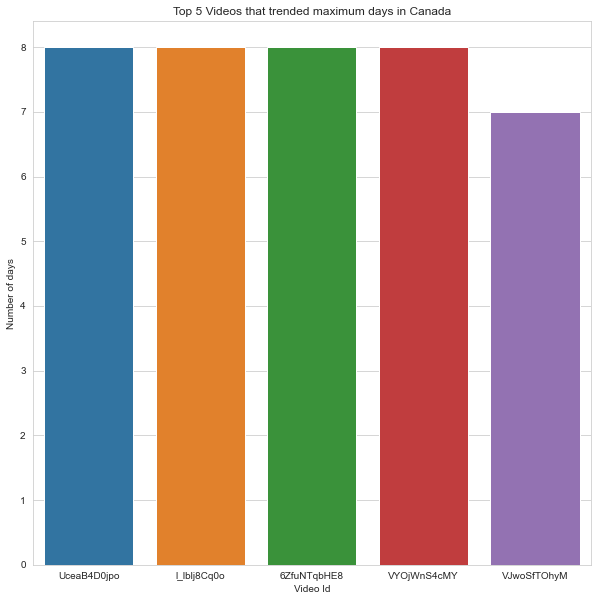

In [128]:
#TOP 5 Videos that trended maximum days from Canada
df_canada_video_trended_maximum_days= df_canada.groupby('video_id')['title'].count().reset_index().sort_values(by='title',ascending=False).head(5)
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x=df_canada_video_trended_maximum_days['video_id'],y=df_canada_video_trended_maximum_days['title'], data=df_canada_video_trended_maximum_days)
plt.xlabel("Video Id")
plt.ylabel("Number of days")
plt.title("Top 5 Videos that trended maximum days in Canada")

In [129]:
#Videos that trended only for a single day from Canada
df_canada_single_day_trending=df_canada.drop_duplicates(subset='video_id', keep=False, inplace=False)
df_canada_single_day_trending.head()

video_id trending_date  \
5   0yIWz1XEeyc    2017-11-14   
12  FyZMnhUtLfE    2017-11-14   
13  7MxiQ4v0EnE    2017-11-14   
16  gifPYwArCVQ    2017-11-14   
17  8NHA23f7LvU    2017-11-14   

                                                title           channel_title  \
5   Jake Paul Says Alissa Violet CHEATED with LOGA...              DramaAlert   
12         猎场 | Game Of Hunting 12【TV版】（胡歌、張嘉譯、祖峰等主演）                    大劇獨播   
13  Daang ( Full Video ) | Mankirt Aulakh | Sukh S...           Speed Records   
16                     Fake Pet Smart Employee Prank!                    NELK   
17  Jason Momoa Wows Hugh Grant With Some Dothraki...  The Graham Norton Show   

   publish_date  category_id publish_time  \
5    2017-11-13           25     07:37:51   
12   2017-11-12            1     16:00:01   
13   2017-11-11           10     16:41:15   
16   2017-11-13           23     01:30:01   
17   2017-11-10           24     19:06:23   

                                                 tags    views   likes  \
5   #DramaAlert|"Drama"|"Alert"|"DramaAlert"|"keem...  1309699  103755   
12  電視劇|"大陸電視劇"|"猎场"|"职场"|"商战"|"爱情"|"都市"|"胡歌"|"陈龙"...   158815     218   
13  punjabi songs|"punjabi bhangra"|"punjabi music...  5718766  127477   
16      prank|"pranks"|"nelk"|"nelkfilmz"|"nelkfilms"   557883   44558   
17  Graham Norton|"Graham Norton Show Official"|"E...  1496225   16116   

    dislikes  comment_count                                  thumbnail_link  \
5       4613          12143  https://i.ytimg.com/vi/0yIWz1XEeyc/default.jpg   
12        30            186  https://i.ytimg.com/vi/FyZMnhUtLfE/default.jpg   
13      7134           8063  https://i.ytimg.com/vi/7MxiQ4v0EnE/default.jpg   
16       621           9619  https://i.ytimg.com/vi/gifPYwArCVQ/default.jpg   
17       236            605  https://i.ytimg.com/vi/8NHA23f7LvU/default.jpg   

    comments_disabled  ratings_disabled  video_error_or_removed  \
5               False             False                   False   
12              False             False                   False   
13              False             False                   False   
16              False             False                   False   
17              False             False                   False   

                                          description  
5   ► Follow for News! - https://twitter.com/KEEMS...  
12  Thanks for watching the drama! Help more peopl...  
13  Song - Daang\nSinger - Mankirt Aulakh\nFaceboo...  
16  3 Days left to cop NELK merch: https://nelk.ca...  
17  I think Sarah Millican was very excited for th...

Text(0.5, 1.0, 'Top 5 Trending Channel in Canada')

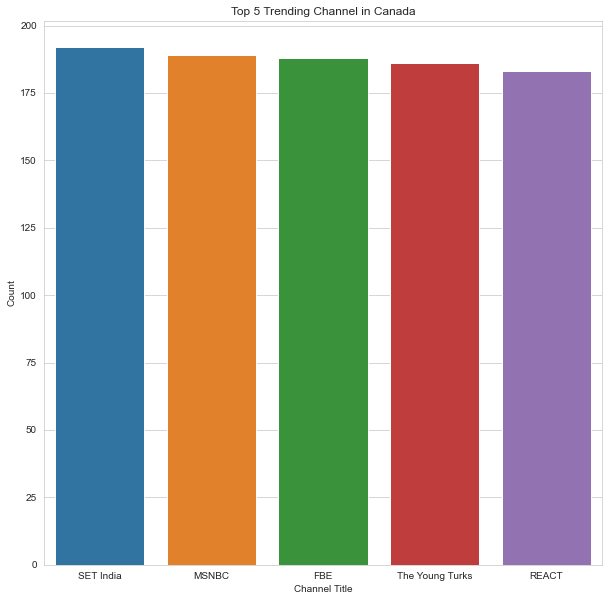

In [130]:
#TOP 5 Trending Channel in Canada
canada_trending_channel=df_canada.groupby(by=['channel_title'],as_index=False).count().sort_values(by='title',ascending=False).head()
plt.figure(figsize=(10,10))
ax = sns.barplot(x=canada_trending_channel['channel_title'],y=canada_trending_channel['video_id'], data=canada_trending_channel)
plt.xlabel("Channel Title")
plt.ylabel("Count")
plt.title("Top 5 Trending Channel in Canada")

Text(0.5, 1.0, 'Top 5 Category IDs for Canada')

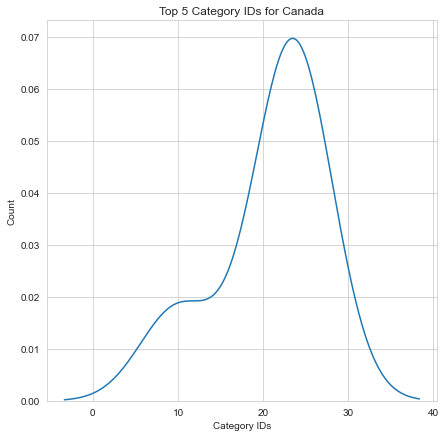

In [131]:
#Top 5 Canada Category IDs
canada_category_id=df_canada.groupby(by=['category_id'],as_index=False).count().sort_values(by='title',ascending=False).head(5)
plt.figure(figsize=(7,7))
sns.kdeplot(canada_category_id['category_id']);
plt.xlabel("Category IDs")
plt.ylabel("Count")
plt.title("Top 5 Category IDs for Canada")

<AxesSubplot: xlabel='views', ylabel='likes'>

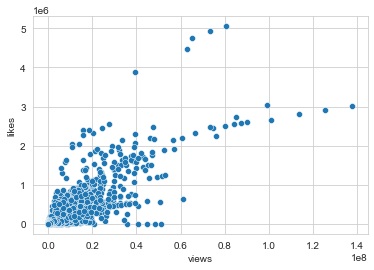

In [132]:
#scatterplot correlation between likes and views in Canada dataframe
sns.scatterplot(x='views',y='likes', data=df_canada)

<AxesSubplot: xlabel='views', ylabel='dislikes'>

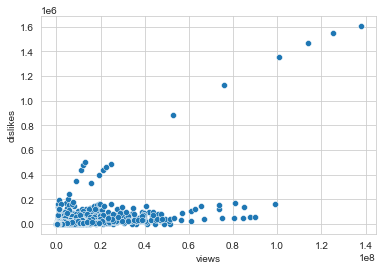

In [133]:
#scatterplot correlation between dislikes and views in USA dataframe
sns.scatterplot(x='views',y='dislikes', data=df_canada)

<AxesSubplot: xlabel='views', ylabel='comment_count'>

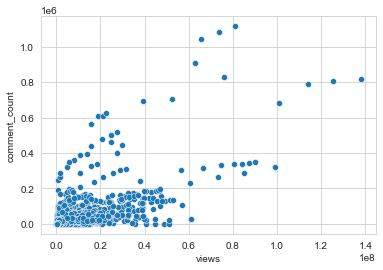

In [134]:
#scatterplot correlation between comment count and views in Canada dataframe
sns.scatterplot(x='views',y='comment_count', data=df_canada)

<AxesSubplot: xlabel='likes', ylabel='comment_count'>

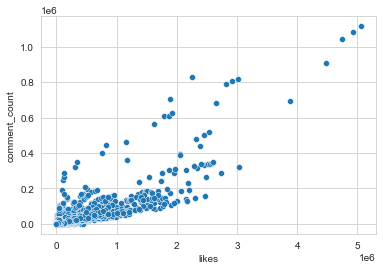

In [135]:
#scatterplot correlation between likes and comment_count in Canada dataframe
sns.scatterplot(x='likes',y='comment_count', data=df_canada)

<AxesSubplot: xlabel='likes', ylabel='dislikes'>

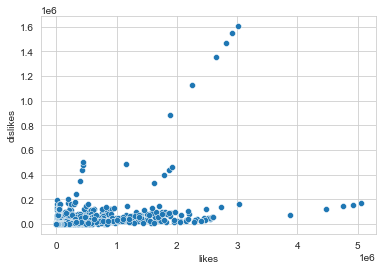

In [136]:
#scatterplot correlation between dislikes and likes in Canada dataframe
sns.scatterplot(x='likes',y='dislikes', data=df_canada)

<AxesSubplot: xlabel='dislikes', ylabel='comment_count'>

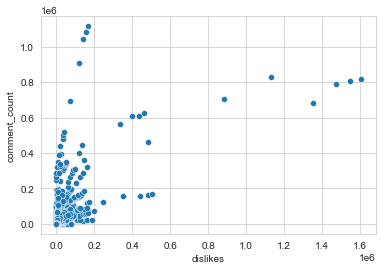

In [137]:
#scatterplot correlation between dislikes and comment count in Canada dataframe
sns.scatterplot(x='dislikes',y='comment_count', data=df_canada)

<AxesSubplot: xlabel='views', ylabel='description'>

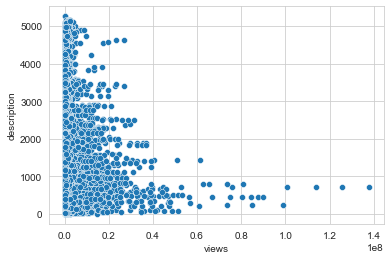

In [138]:
#scatterplot correlation between length of description and views in canada dataframe
sns.scatterplot(y=df_canada.description.apply(lambda x: len(str(x))),x=df_canada.views)
#no correlation found

<AxesSubplot: xlabel='views', ylabel='title'>

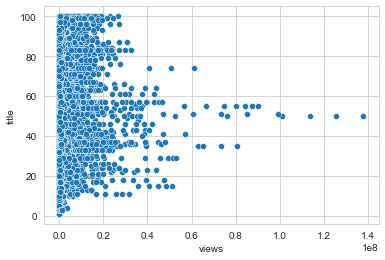

In [139]:
#scatterplot correlation between length of title and views in canada dataframe
sns.scatterplot(y=df_canada.title.apply(lambda x: len(str(x))),x=df_canada.views)
#no correlation found

In [140]:
#All category IDs in Canada dataframe
df_canada['category_id'].unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30],
      dtype=int64)

# Sentimental Analysis - Canada Dataframe

In [141]:
#Title column polarity, subjectivity, analysis - Canada Dataframe
titledata_canada = df_canada['title']
titledata_canada['cleantitle'] = titledata_canada.apply(clean)
titledata_canada['polarity'] = titledata_canada['cleantitle'].apply(polarity)
titledata_canada['subjectivity'] = titledata_canada['cleantitle'].apply(subjectivity)
titledata_canada['analysis'] = titledata_canada['polarity'].apply(getanalysis)

In [142]:
#Title Column polarity - Canada Dataframe
titledata_canada['analysis'].value_counts()

neutral     24136
positive    10724
negative     6021
Name: title, dtype: int64

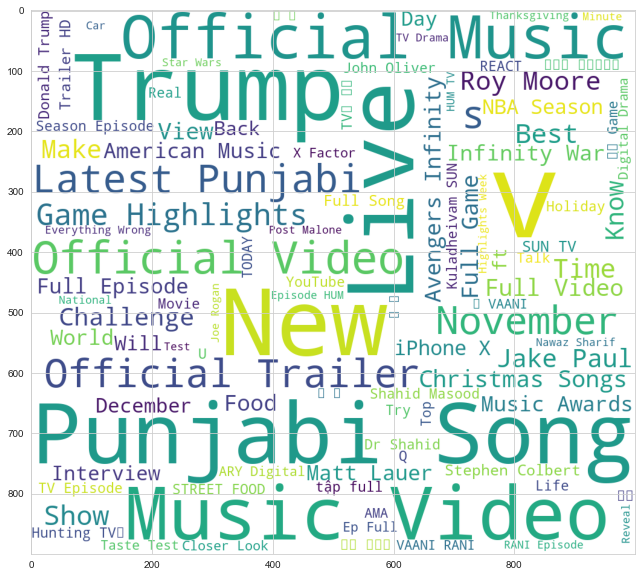

In [143]:
#WordCloud for Title Column - Canada Dataset
word_cloud(titledata_canada[:5000])

In [144]:
#Tags column polarity, subjectivity, analysis in Canada
tagsdata_canada = df_canada['tags']
tagsdata_canada['cleantags'] = tagsdata_canada.apply(clean)
tagsdata_canada['polarity'] = tagsdata_canada['cleantags'].apply(polarity)
tagsdata_canada['subjectivity'] = tagsdata_canada['cleantags'].apply(subjectivity)
tagsdata_canada['analysis'] = tagsdata_canada['polarity'].apply(getanalysis)

In [145]:
#Tags Column polarity
tagsdata_canada['analysis'].value_counts()

positive    19451
neutral     13684
negative     7746
Name: tags, dtype: int64

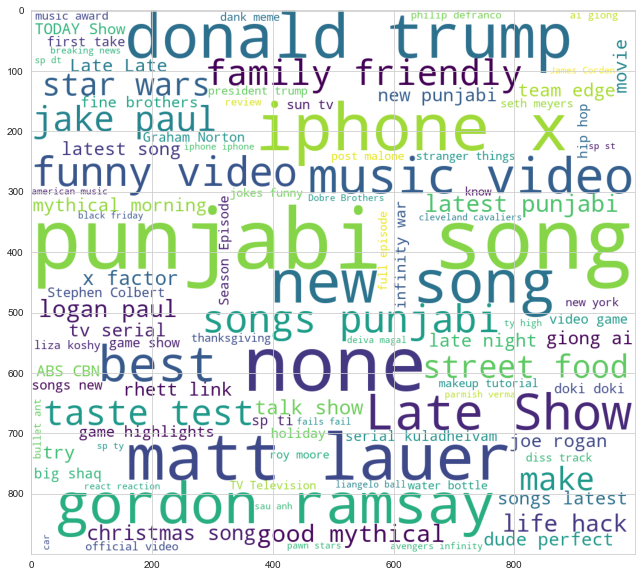

In [146]:
#WordCloud for Tags Column - Canada Dataset
word_cloud(tagsdata_canada[:5000])

In [147]:
#Description column polarity, subjectivity, analysis - canada dataset
descriptiondata_canada = df_canada['description']
descriptiondata_canada['cleandescription'] = descriptiondata_canada.apply(clean)
descriptiondata_canada['polarity'] = descriptiondata_canada['cleandescription'].apply(polarity)
descriptiondata_canada['subjectivity'] = descriptiondata_canada['cleandescription'].apply(subjectivity)
descriptiondata_canada['analysis'] = descriptiondata_canada['polarity'].apply(getanalysis)

In [148]:
#Description Column polarity - Canada
descriptiondata_canada['analysis'].value_counts()

positive    27142
neutral      8273
negative     5466
Name: description, dtype: int64

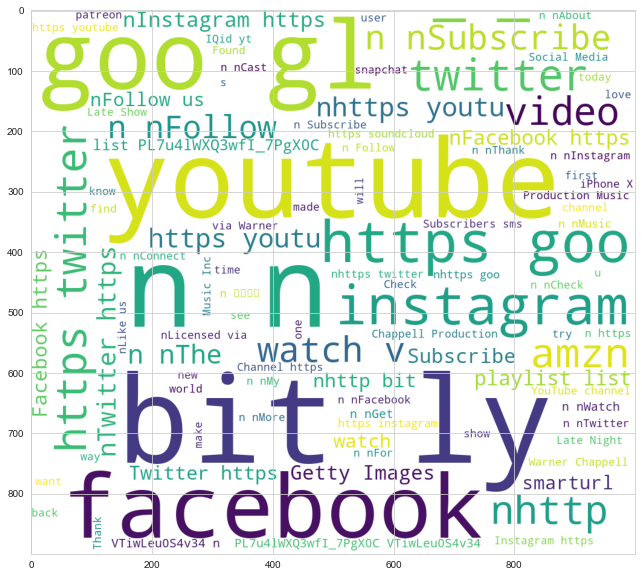

In [149]:
#WordCloud for Description Column - Canada Dataset
word_cloud(descriptiondata_canada[:5000])

# Youtube video likes prediction - Canada Dataframe

In [150]:
df_canada1 = df_canada.copy()

In [151]:
df_canada1['trending_date'] = pd.to_datetime(df_canada1['trending_date'], format='%y.%d.%m')

In [152]:
df_canada1['trending_month']= df_canada1['trending_date'].dt.month

In [153]:
labelencoder = LabelEncoder()
df_canada1['channel_no'] = labelencoder.fit_transform(df_canada1['channel_title'])
df_canada1

video_id trending_date  \
0      n1WpP7iowLc    2017-11-14   
1      0dBIkQ4Mz1M    2017-11-14   
2      5qpjK5DgCt4    2017-11-14   
3      d380meD0W0M    2017-11-14   
4      2Vv-BfVoq4g    2017-11-14   
...            ...           ...   
40876  sGolxsMSGfQ    2018-06-14   
40877  8HNuRNi8t70    2018-06-14   
40878  GWlKEM3m2EE    2018-06-14   
40879  lbMKLzQ4cNQ    2018-06-14   
40880  POTgw38-m58    2018-06-14   

                                                   title     channel_title  \
0             Eminem - Walk On Water (Audio) ft. Beyoncé        EminemVEVO   
1                          PLUSH - Bad Unboxing Fan Mail         iDubbbzTV   
2      Racist Superman | Rudy Mancuso, King Bach & Le...      Rudy Mancuso   
3                               I Dare You: GOING BALD!?          nigahiga   
4            Ed Sheeran - Perfect (Official Music Video)        Ed Sheeran   
...                                                  ...               ...   
40876                       HOW2: How to Solve a Mystery   Annoying Orange   
40877                   Eli Lik Lik Episode 13 Partie 01  Elhiwar Ettounsi   
40878  KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...    Kingdom Hearts   
40879                   Trump Advisor Grovels To Trudeau   The Young Turks   
40880                   【完整版】遇到恐怖情人該怎麼辦？2018.06.13小明星大跟班          我愛小明星大跟班   

      publish_date  category_id publish_time  \
0       2017-11-10           10     17:00:03   
1       2017-11-13           23     17:00:00   
2       2017-11-12           23     19:05:24   
3       2017-11-12           24     18:01:41   
4       2017-11-09           10     11:04:14   
...            ...          ...          ...   
40876   2018-06-13           24     18:00:07   
40877   2018-06-13           24     19:01:18   
40878   2018-06-11           20     17:30:53   
40879   2018-06-13           25     04:00:05   
40880   2018-06-13           24     16:00:03   

                                                    tags     views    likes  \
0      Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1      plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2      racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3      ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4      edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   
...                                                  ...       ...      ...   
40876  annoying orange|"funny"|"fruit"|"talking"|"ani...     80685     1701   
40877  hkayet tounsia|"elhiwar ettounsi"|"denya okhra...    103339      460   
40878  Kingdom Hearts|"KH3"|"Kingdom Hearts 3"|"Froze...    773347    25900   
40879  180612__TB02SorryExcuse|"News"|"Politics"|"The...    115225     2115   
40880  吳宗憲|"吳姍儒"|"小明星大跟班"|"Sandy"|"Jacky wu"|"憲哥"|"中天...    107392      300   

       dislikes  comment_count  \
0         43420         125882   
1          1688          13030   
2          5339           8181   
3          1989          17518   
4         21082          85067   
...         ...            ...   
40876        99           1312   
40877        66             51   
40878       224           3881   
40879       182           1672   
40880        62            251   

                                       thumbnail_link  comments_disabled  \
0      https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg              False   
1      https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg              False   
2      https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg              False   
3      https://i.ytimg.com/vi/d380meD0W0M/default.jpg              False   
4      https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg              False   
...                                               ...                ...   
40876  https://i.ytimg.com/vi/sGolxsMSGfQ/default.jpg              False   
40877  https://i.ytimg.com/vi/8HNuRNi8t70/default.jpg              False   
40878  https://i.ytim

In [154]:
X3=df_canada1[['channel_no','trending_month','comment_count','dislikes','views']]
X3.head()

channel_no  trending_month  comment_count  dislikes     views
0        1175              11         125882     43420  17158579
1        4596              11          13030      1688   1014651
2        3251              11           8181      5339   3191434
3        4706              11          17518      1989   2095828
4        1150              11          85067     21082  33523622

In [155]:
Y3=df_canada1["likes"]
Y3.head()

0     787425
1     127794
2     146035
3     132239
4    1634130
Name: likes, dtype: int64

In [156]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, Y3, test_size=0.2)

In [157]:
len(X3_train), len(X3_test)

(32704, 8177)

In [158]:
transfer = StandardScaler()
X3_train = transfer.fit_transform(X3_train)
X3_test = transfer.transform(X3_test)

In [159]:
model4 = LinearRegression()
model4.fit(X3_train,y3_train)

LinearRegression()

In [160]:
Y3_pred=model4.predict(X3_test)
Y3_pred

array([949052.50370534,  31370.62293691,  33151.79120024, ...,
         5485.84023706,  10965.94709018,  20637.63135767])

In [161]:
LRScore = model4.score(X3_test,y3_test)
print("Accuracy for Linear Regression:",LRScore*100)

Accuracy for Linear Regression: 80.78758838292896


In [162]:
from sklearn.ensemble import RandomForestClassifier
model5 = RandomForestClassifier()

In [163]:
model5.fit(X3_train[:2000],y3_train[:2000])

RandomForestClassifier()

In [164]:
Y3_pred_rf=model5.predict(X3_test)
Y3_pred_rf

array([535990,  91834,   6750, ...,   2503,   4288,   9216], dtype=int64)

In [165]:
RandomForestClassifierScore = model5.score(X3_test,y3_test)
print("Accuracy obtained for - Random Forest Classifier :",RandomForestClassifierScore*100)

Accuracy obtained for - Random Forest Classifier : 0.7093065916595328


# Exploratory Data Analysis - Great Britian dataframe

In [166]:
df_gb = pd.read_csv("GBvideos.csv")

In [167]:
#Great Britian dataframe Info
df_gb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38916 entries, 0 to 38915
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                38916 non-null  object
 1   trending_date           38916 non-null  object
 2   title                   38916 non-null  object
 3   channel_title           38916 non-null  object
 4   category_id             38916 non-null  int64 
 5   publish_time            38916 non-null  object
 6   tags                    38916 non-null  object
 7   views                   38916 non-null  int64 
 8   likes                   38916 non-null  int64 
 9   dislikes                38916 non-null  int64 
 10  comment_count           38916 non-null  int64 
 11  thumbnail_link          38916 non-null  object
 12  comments_disabled       38916 non-null  bool  
 13  ratings_disabled        38916 non-null  bool  
 14  video_error_or_removed  38916 non-null  bool  
 15  de

In [168]:
df_gb

video_id trending_date  \
0      Jw1Y-zhQURU      17.14.11   
1      3s1rvMFUweQ      17.14.11   
2      n1WpP7iowLc      17.14.11   
3      PUTEiSjKwJU      17.14.11   
4      rHwDegptbI4      17.14.11   
...            ...           ...   
38911  l884wKofd54      18.14.06   
38912  IP8k2xkhOdI      18.14.06   
38913  Il-an3K9pjg      18.14.06   
38914  -DRsfNObKIQ      18.14.06   
38915  4YFo4bdMO8Q      18.14.06   

                                                   title  \
0          John Lewis Christmas Ad 2017 - #MozTheMonster   
1              Taylor Swift: …Ready for It? (Live) - SNL   
2             Eminem - Walk On Water (Audio) ft. Beyoncé   
3      Goals from Salford City vs Class of 92 and Fri...   
4      Dashcam captures truck's near miss with child ...   
...                                                  ...   
38911  Enrique Iglesias - MOVE TO MIAMI (Official Vid...   
38912  Jacob Sartorius - Up With It (Official Music V...   
38913                 Anne-Marie - 2002 [Official Video]   
38914  Eleni Foureira - Fuego - Cyprus - LIVE - First...   
38915  KYLE - Ikuyo feat.  2 Chainz & Sophia Black [A...   

                    channel_title  category_id              publish_time  \
0                      John Lewis           26  2017-11-10T07:38:29.000Z   
1             Saturday Night Live           24  2017-11-12T06:24:44.000Z   
2                      EminemVEVO           10  2017-11-10T17:00:03.000Z   
3      Salford City Football Club           17  2017-11-13T02:30:38.000Z   
4                Cute Girl Videos           25  2017-11-13T01:45:13.000Z   
...                           ...          ...                       ...   
38911         EnriqueIglesiasVEVO           10  2018-05-09T07:00:01.000Z   
38912             Jacob Sartorius           10  2018-05-11T17:09:16.000Z   
38913                  Anne-Marie           10  2018-05-08T11:05:08.000Z   
38914     Eurovision Song Contest           24  2018-05-08T20:32:32.000Z   
38915              SuperDuperKyle           10  2018-05-11T04:06:35.000Z   

                                                    tags     views   likes  \
0      christmas|"john lewis christmas"|"john lewis"|...   7224515   55681   
1      SNL|"Saturday Night Live"|"SNL Season 43"|"Epi...   1053632   25561   
2      Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579  787420   
3      Salford City FC|"Salford City"|"Salford"|"Clas...     27833     193   
4                                                 [none]      9815      30   
...                                                  ...       ...     ...   
38911  Enrique Iglesias feat. Pitbull|"MOVE TO MIAMI"...  25066952  268088   
38912  jacob sartorius|"jacob"|"up with it"|"jacob sa...   1492219   61998   
38913  anne|"marie"|"anne-marie"|"2002"|"two thousand...  29641412  394830   
38914  Eurovision Song Contest|"2018"|"Lisbon"|"Cypru...  14317515  151870   
38915  Kyle|"SuperDuperKyle"|"Ikuyo"|"2 Chainz"|"Soph...    607552   18271   

       dislikes  comment_count  \
0         10247           9479   
1          2294           2757   
2         43420         125882   
3            12             37   
4             2             30   
...         ...            ...   
38911     12783           9933   
38912     13781          24330   
38913      8892          19988   
38914     45875          26766   
38915       274           1423   

                                       thumbnail_link  comments_disabled  \
0      https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg              False   
1      https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg              False   
2      https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg              False   
3      https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg              False   
4      https://i.ytimg.com/vi/rHwDegptbI4/default.jpg              False   
...                                               ...                ...   
38911  https://i.ytimg.com/vi/l884wKofd54/default.jpg            

In [169]:
#Converting trending_date and publish_time columns to datetime datatype in Great Britian Dataframe
df_gb['trending_date'] = pd.to_datetime(df_gb['trending_date'], format='%y.%d.%m')
df_gb['publish_time'] = pd.to_datetime(df_gb['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [170]:
#Spilling publish_time column into publish_date and publish_time separate columns in Great Britian Dataframe
df_gb.insert(4, 'publish_date', df_gb['publish_time'].dt.date)
df_gb['publish_time'] = df_gb['publish_time'].dt.time
df_gb['publish_date']=pd.to_datetime(df_gb['publish_date'])

In [171]:
#USA Dataframe Info
df_gb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38916 entries, 0 to 38915
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                38916 non-null  object        
 1   trending_date           38916 non-null  datetime64[ns]
 2   title                   38916 non-null  object        
 3   channel_title           38916 non-null  object        
 4   publish_date            38916 non-null  datetime64[ns]
 5   category_id             38916 non-null  int64         
 6   publish_time            38916 non-null  object        
 7   tags                    38916 non-null  object        
 8   views                   38916 non-null  int64         
 9   likes                   38916 non-null  int64         
 10  dislikes                38916 non-null  int64         
 11  comment_count           38916 non-null  int64         
 12  thumbnail_link          38916 non-null  object

In [172]:
#checking if any null values in Great Britian dataframe
df_gb.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
publish_date                0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               612
dtype: int64

In [173]:
#Replacing null values with a string in GB Dataframe
df_gb.description = df_gb.description.fillna('Description Not Found')

In [174]:
df_gb

video_id trending_date  \
0      Jw1Y-zhQURU    2017-11-14   
1      3s1rvMFUweQ    2017-11-14   
2      n1WpP7iowLc    2017-11-14   
3      PUTEiSjKwJU    2017-11-14   
4      rHwDegptbI4    2017-11-14   
...            ...           ...   
38911  l884wKofd54    2018-06-14   
38912  IP8k2xkhOdI    2018-06-14   
38913  Il-an3K9pjg    2018-06-14   
38914  -DRsfNObKIQ    2018-06-14   
38915  4YFo4bdMO8Q    2018-06-14   

                                                   title  \
0          John Lewis Christmas Ad 2017 - #MozTheMonster   
1              Taylor Swift: …Ready for It? (Live) - SNL   
2             Eminem - Walk On Water (Audio) ft. Beyoncé   
3      Goals from Salford City vs Class of 92 and Fri...   
4      Dashcam captures truck's near miss with child ...   
...                                                  ...   
38911  Enrique Iglesias - MOVE TO MIAMI (Official Vid...   
38912  Jacob Sartorius - Up With It (Official Music V...   
38913                 Anne-Marie - 2002 [Official Video]   
38914  Eleni Foureira - Fuego - Cyprus - LIVE - First...   
38915  KYLE - Ikuyo feat.  2 Chainz & Sophia Black [A...   

                    channel_title publish_date  category_id publish_time  \
0                      John Lewis   2017-11-10           26     07:38:29   
1             Saturday Night Live   2017-11-12           24     06:24:44   
2                      EminemVEVO   2017-11-10           10     17:00:03   
3      Salford City Football Club   2017-11-13           17     02:30:38   
4                Cute Girl Videos   2017-11-13           25     01:45:13   
...                           ...          ...          ...          ...   
38911         EnriqueIglesiasVEVO   2018-05-09           10     07:00:01   
38912             Jacob Sartorius   2018-05-11           10     17:09:16   
38913                  Anne-Marie   2018-05-08           10     11:05:08   
38914     Eurovision Song Contest   2018-05-08           24     20:32:32   
38915              SuperDuperKyle   2018-05-11           10     04:06:35   

                                                    tags     views   likes  \
0      christmas|"john lewis christmas"|"john lewis"|...   7224515   55681   
1      SNL|"Saturday Night Live"|"SNL Season 43"|"Epi...   1053632   25561   
2      Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579  787420   
3      Salford City FC|"Salford City"|"Salford"|"Clas...     27833     193   
4                                                 [none]      9815      30   
...                                                  ...       ...     ...   
38911  Enrique Iglesias feat. Pitbull|"MOVE TO MIAMI"...  25066952  268088   
38912  jacob sartorius|"jacob"|"up with it"|"jacob sa...   1492219   61998   
38913  anne|"marie"|"anne-marie"|"2002"|"two thousand...  29641412  394830   
38914  Eurovision Song Contest|"2018"|"Lisbon"|"Cypru...  14317515  151870   
38915  Kyle|"SuperDuperKyle"|"Ikuyo"|"2 Chainz"|"Soph...    607552   18271   

       dislikes  comment_count  \
0         10247           9479   
1          2294           2757   
2         43420         125882   
3            12             37   
4             2             30   
...         ...            ...   
38911     12783           9933   
38912     13781          24330   
38913      8892          19988   
38914     45875          26766   
38915       274           1423   

                                       thumbnail_link  comments_disabled  \
0      https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg              False   
1      https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg              False   
2      https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg              False   
3      https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg              False   
4      https://i.ytimg.com/vi/rHwDegptbI4/default.jpg              False   
...                                               ...                ...   
38911  https://i.ytimg.com/vi/l884wKofd54/default.jpg            

In [175]:
#checking if any null values in GB dataframe
df_gb.isnull().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
publish_date              0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
dtype: int64

In [176]:
#Top 10 channels with most total views on trending videos from Great Britian
df_gb.groupby('channel_title')['views'].sum().reset_index().sort_values(by='views',ascending=False).head(10)

channel_title       views
920             NickyJamTV  8516190092
969                  Ozuna  8305198063
120              Bad Bunny  6891280759
342              DrakeVEVO  6581834413
236    ChildishGambinoVEVO  6101309613
424          Flow La Movie  5151438858
78        ArianaGrandeVevo  4107436350
829   Marvel Entertainment  3993421220
1532      jypentertainment  3624070589
359             Ed Sheeran  3589056783

In [177]:
#Top 10 channels with most total likes on trending videos from Great Britian
df_gb.groupby('channel_title')['likes'].sum().reset_index().sort_values(by='likes',ascending=False).head(10)

channel_title      likes
1516               ibighit  283170968
236    ChildishGambinoVEVO  148408057
342              DrakeVEVO  148133996
120              Bad Bunny  106452827
829   Marvel Entertainment  100670674
78        ArianaGrandeVevo   97532165
1532      jypentertainment   96640346
359             Ed Sheeran   91133438
1233       TaylorSwiftVEVO   86980312
1111                SMTOWN   79968284

In [178]:
#Top 10 channels with most total dislikes on trending videos from Great Britian
df_gb.groupby('channel_title')['dislikes'].sum().reset_index().sort_values(by='dislikes',ascending=False).head(10)

channel_title  dislikes
758      Logan Paul Vlogs  32461772
1446    YouTube Spotlight  27269629
768           Lucas Lucco  10006058
236   ChildishGambinoVEVO   9558340
791        MLG Highlights   6428022
1532     jypentertainment   5542504
120             Bad Bunny   5256551
1398      WORLDSTARHIPHOP   4902072
1233      TaylorSwiftVEVO   4852863
969                 Ozuna   4743926

In [179]:
#Top 10 channels with most total comments on trending videos from Great Britian
df_gb.groupby('channel_title')['comment_count'].sum().reset_index().sort_values(by='comment_count',ascending=False).head(10)

channel_title  comment_count
1516               ibighit       42026951
758       Logan Paul Vlogs       33078023
1532      jypentertainment       15703519
236    ChildishGambinoVEVO       15441941
1446     YouTube Spotlight       14262175
829   Marvel Entertainment       11525772
998              PewDiePie        9560538
342              DrakeVEVO        9225778
1111                SMTOWN        8407734
78        ArianaGrandeVevo        7869276

Text(0.5, 1.0, 'Top 5 Videos that trended maximum days in GB')

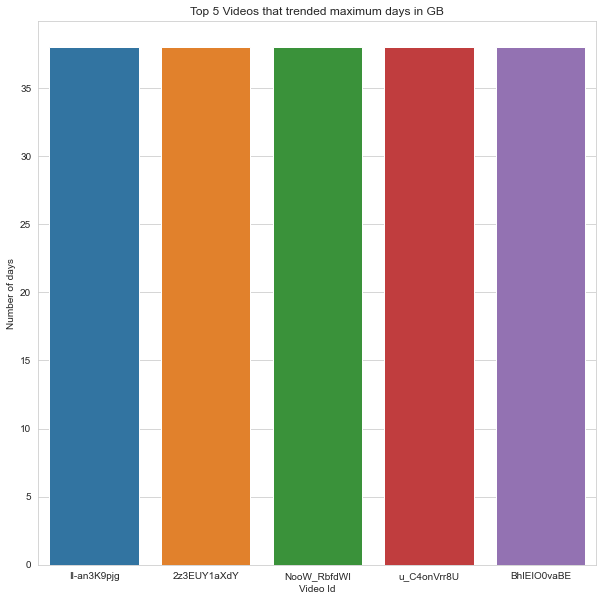

In [180]:
#TOP 5 Videos that trended maximum days from GB
df_gb_video_trended_maximum_days= df_gb.groupby('video_id')['title'].count().reset_index().sort_values(by='title',ascending=False).head(5)
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x=df_gb_video_trended_maximum_days['video_id'],y=df_gb_video_trended_maximum_days['title'], data=df_gb_video_trended_maximum_days)
plt.xlabel("Video Id")
plt.ylabel("Number of days")
plt.title("Top 5 Videos that trended maximum days in GB")

In [181]:
#Videos that trended only for a single day from GB
df_gb_single_day_trending=df_gb.drop_duplicates(subset='video_id', keep=False, inplace=False)
df_gb_single_day_trending.head()

video_id trending_date  \
4   rHwDegptbI4    2017-11-14   
5   AumaWl0TNBo    2017-11-14   
7   -N5eucPMTTc    2017-11-14   
22  fiusxyygqGk    2017-11-14   
90  sLJdBmAeB_U    2017-11-14   

                                                title       channel_title  \
4   Dashcam captures truck's near miss with child ...    Cute Girl Videos   
5                        How My Relationship Started!  PointlessBlogVlogs   
7                       CHRISTMAS HAS GONE TO MY HEAD          MoreZoella   
22       Marshmello - You & Me (Official Music Video)          marshmello   
90  COME SHOPPING WITH ME AND TRY ON NEW CLOTHING ...           Inthefrow   

   publish_date  category_id publish_time  \
4    2017-11-13           25     01:45:13   
5    2017-11-11           24     17:00:00   
7    2017-11-10           22     19:19:43   
22   2017-11-10           10     15:00:03   
90   2017-11-07           26     19:00:50   

                                                 tags    views   likes  \
4                                              [none]     9815      30   
5   pointlessblog|"pointlessblogtv"|"pointlessblog...  1182775   52708   
7   zoe sugg|"zoella"|"zoe"|"vlog"|"vlogging"|"vlo...  1164201   57309   
22  selena gomez wolves|"alone marshmello"|"marshm...  3407008  207262   
90  Inthefrow|"In the frow"|"COME SHOPPING WITH ME...    87772    2617   

    dislikes  comment_count                                  thumbnail_link  \
4          2             30  https://i.ytimg.com/vi/rHwDegptbI4/default.jpg   
5       1431           2333  https://i.ytimg.com/vi/AumaWl0TNBo/default.jpg   
7        749            624  https://i.ytimg.com/vi/-N5eucPMTTc/default.jpg   
22      3167          13279  https://i.ytimg.com/vi/fiusxyygqGk/default.jpg   
90        86            192  https://i.ytimg.com/vi/sLJdBmAeB_U/default.jpg   

    comments_disabled  ratings_disabled  video_error_or_removed  \
4               False             False                   False   
5               False             False                   False   
7               False             False                   False   
22              False             False                   False   
90              False             False                   False   

                                          description  
4   Dashcam captures truck's near miss with child ...  
5   ► HOW MY RELATIONSHIP STARTED!\n► PB Merch • h...  
7   CHRISTMAS HAS GONE TO MY HEAD\nPrevious Vlog: ...  
22  PURCHASE YOU & ME HERE ▶ https://smarturl.it/m...  
90  COME SHOPPING WITH ME AND TRYING ON NEW CLOTHI...

Text(0.5, 1.0, 'Top 5 Trending Channel in GB')

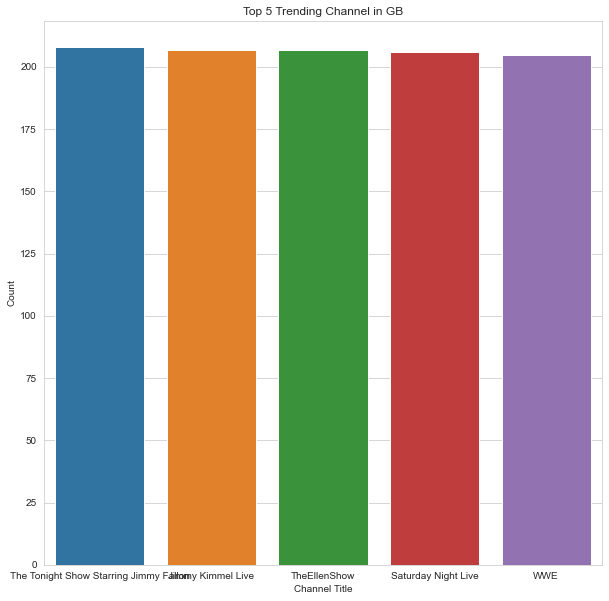

In [182]:
#TOP 5 Trending Channel in GB
gb_trending_channel=df_gb.groupby(by=['channel_title'],as_index=False).count().sort_values(by='title',ascending=False).head()
plt.figure(figsize=(10,10))
ax = sns.barplot(x=gb_trending_channel['channel_title'],y=gb_trending_channel['video_id'], data=gb_trending_channel)
plt.xlabel("Channel Title")
plt.ylabel("Count")
plt.title("Top 5 Trending Channel in GB")

Text(0.5, 1.0, 'Top 5 Category IDs for Great Britian')

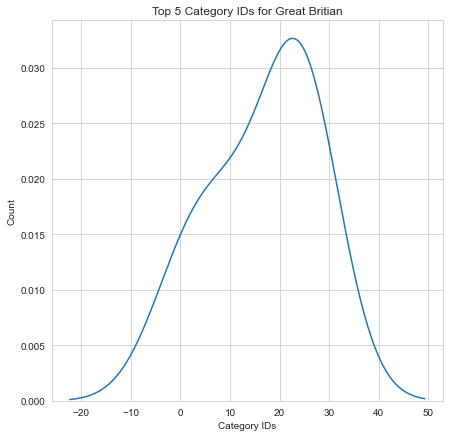

In [183]:
#Top 5 GB Category IDs
gb_category_id=df_gb.groupby(by=['category_id'],as_index=False).count().sort_values(by='title',ascending=False).head(5)
plt.figure(figsize=(7,7))
sns.kdeplot(gb_category_id['category_id']);
plt.xlabel("Category IDs")
plt.ylabel("Count")
plt.title("Top 5 Category IDs for Great Britian")

<AxesSubplot: xlabel='views', ylabel='likes'>

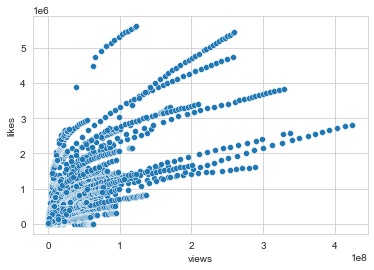

In [184]:
#scatterplot correlation between likes and views in Great Britian dataframe
sns.scatterplot(x='views',y='likes', data=df_gb)

<AxesSubplot: xlabel='views', ylabel='dislikes'>

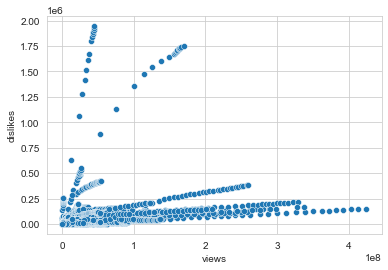

In [185]:
#scatterplot correlation between dislikes and views in Great Britian dataframe
sns.scatterplot(x='views',y='dislikes', data=df_gb)

<AxesSubplot: xlabel='views', ylabel='comment_count'>

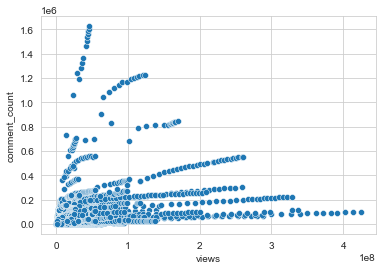

In [186]:
#scatterplot correlation between comment count and views in Great Britian dataframe
sns.scatterplot(x='views',y='comment_count', data=df_gb)

<AxesSubplot: xlabel='likes', ylabel='comment_count'>

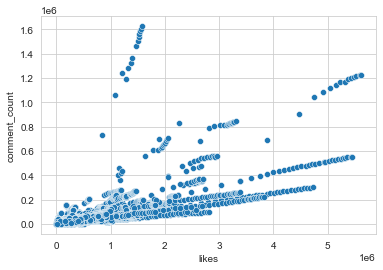

In [187]:
#scatterplot correlation between likes and comment_count in Great Britian dataframe
sns.scatterplot(x='likes',y='comment_count', data=df_gb)

<AxesSubplot: xlabel='likes', ylabel='dislikes'>

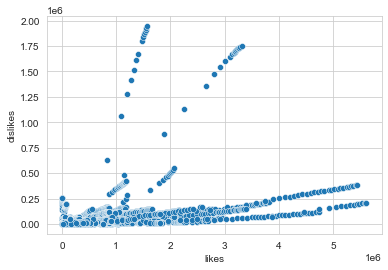

In [188]:
#scatterplot correlation between dislikes and likes in Great Britian dataframe
sns.scatterplot(x='likes',y='dislikes', data=df_gb)

<AxesSubplot: xlabel='dislikes', ylabel='comment_count'>

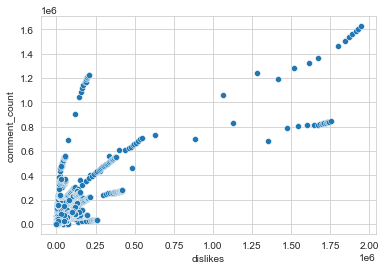

In [189]:
#scatterplot correlation between dislikes and comment count in Great Britian dataframe
sns.scatterplot(x='dislikes',y='comment_count', data=df_gb)

<AxesSubplot: xlabel='views', ylabel='description'>

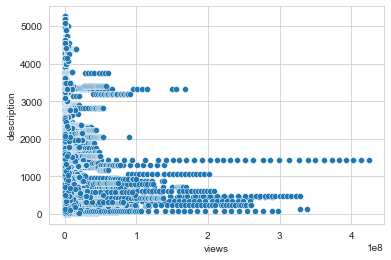

In [190]:
#scatterplot correlation between length of description and views in gb dataframe
sns.scatterplot(y=df_gb.description.apply(lambda x: len(str(x))),x=df_gb.views)
#no correlation found

<AxesSubplot: xlabel='views', ylabel='title'>

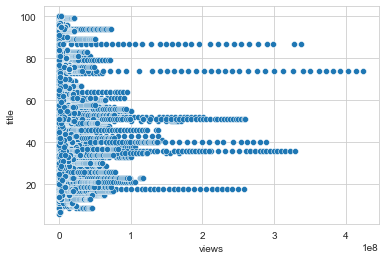

In [191]:
#scatterplot correlation between length of title and views in gb views
sns.scatterplot(y=df_gb.title.apply(lambda x: len(str(x))),x=df_gb.views)
#no correlation found

In [192]:
#All category IDs in GB dataframe
df_gb['category_id'].unique()

array([26, 24, 10, 17, 25, 22, 23, 28, 15, 27,  1, 20,  2, 19, 29, 43],
      dtype=int64)

# Sentimental Analysis - Great Britian Dataframe

In [193]:
#Title column polarity, subjectivity, analysis - Great Britian Dataframe
titledata_gb = df_gb['title']
titledata_gb['cleantitle'] = titledata_gb.apply(clean)
titledata_gb['polarity'] = titledata_gb['cleantitle'].apply(polarity)
titledata_gb['subjectivity'] = titledata_gb['cleantitle'].apply(subjectivity)
titledata_gb['analysis'] = titledata_gb['polarity'].apply(getanalysis)

In [194]:
#Title Column polarity - Great Britian Dataframe
titledata_gb['analysis'].value_counts()

neutral     24456
positive     9425
negative     5035
Name: title, dtype: int64

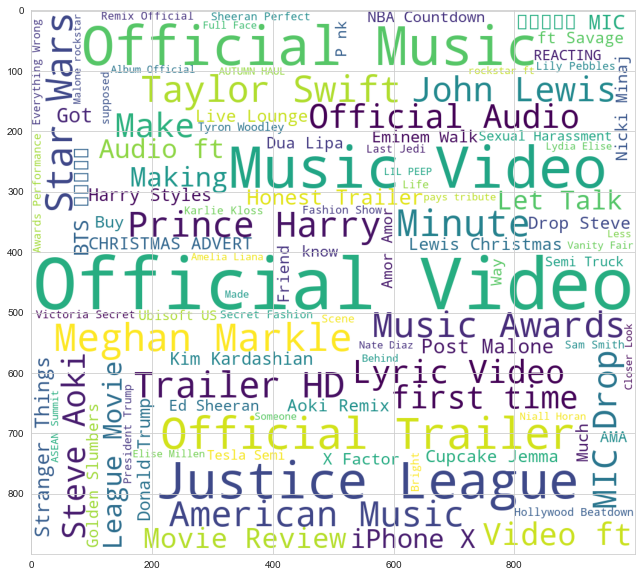

In [195]:
#WordCloud for Title Column - Great Britian Dataset
word_cloud(titledata_gb[:5000])

In [196]:
#Tags column polarity, subjectivity, analysis in Great Britain
tagsdata_gb = df_gb['tags']
tagsdata_gb['cleantags'] = tagsdata_gb.apply(clean)
tagsdata_gb['polarity'] = tagsdata_gb['cleantags'].apply(polarity)
tagsdata_gb['subjectivity'] = tagsdata_gb['cleantags'].apply(subjectivity)
tagsdata_gb['analysis'] = tagsdata_gb['polarity'].apply(getanalysis)

In [197]:
#Tags Column polarity - Great Britain Dataframe
tagsdata_gb['analysis'].value_counts()

positive    17944
neutral     13470
negative     7502
Name: tags, dtype: int64

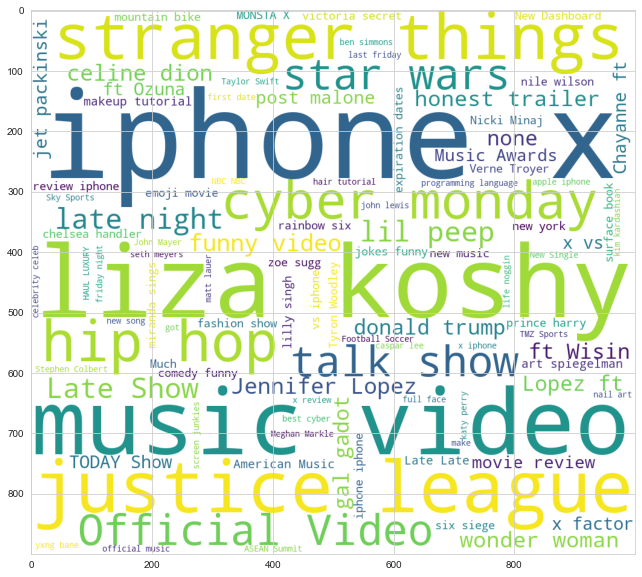

In [198]:
#WordCloud for tags Column - Great Britain Dataset
word_cloud(tagsdata_gb[:5000])

In [199]:
#Description column polarity, subjectivity, analysis - Great Britain dataset
descriptiondata_gb = df_gb['description']
descriptiondata_gb['cleandescription'] = descriptiondata_gb.apply(clean)
descriptiondata_gb['polarity'] = descriptiondata_gb['cleandescription'].apply(polarity)
descriptiondata_gb['subjectivity'] = descriptiondata_gb['cleandescription'].apply(subjectivity)
descriptiondata_gb['analysis'] = descriptiondata_gb['polarity'].apply(getanalysis)

In [200]:
#Description Column polarity - Great Britain
descriptiondata_gb['analysis'].value_counts()

positive    26469
neutral      6826
negative     5621
Name: description, dtype: int64

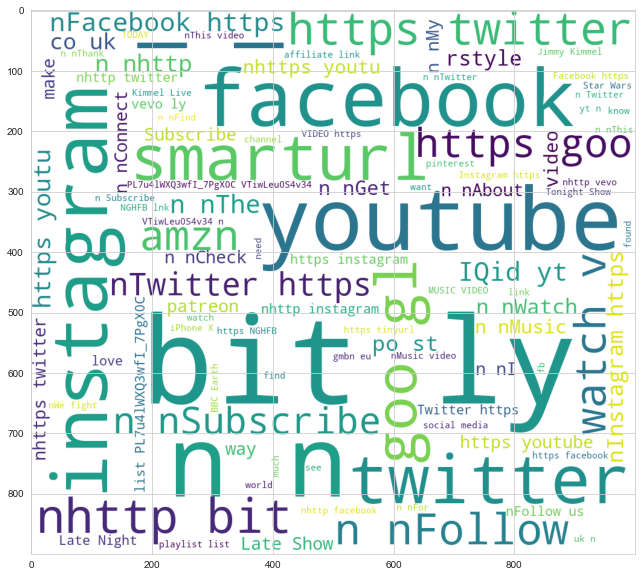

In [201]:
#WordCloud for tags Column - Great Britain Dataset
word_cloud(descriptiondata_gb[:5000])

# Youtube Video likes prediction - Great Britain Dataset

In [202]:
df_gb1 = df_gb.copy()

In [203]:
df_gb1['trending_date'] = pd.to_datetime(df_gb1['trending_date'], format='%y.%d.%m')

In [204]:
df_gb1['trending_month']= df_gb1['trending_date'].dt.month

In [205]:
labelencoder = LabelEncoder()
df_usa1['channel_no'] = labelencoder.fit_transform(df_usa1['channel_title'])
df_usa1

video_id trending_date  \
0      2kyS6SvSYSE    2017-11-14   
1      1ZAPwfrtAFY    2017-11-14   
2      5qpjK5DgCt4    2017-11-14   
3      puqaWrEC7tY    2017-11-14   
4      d380meD0W0M    2017-11-14   
...            ...           ...   
40944  BZt0qjTWNhw    2018-06-14   
40945  1h7KV2sjUWY    2018-06-14   
40946  D6Oy4LfoqsU    2018-06-14   
40947  oV0zkMe1K8s    2018-06-14   
40948  ooyjaVdt-jA    2018-06-14   

                                                   title  \
0                     WE WANT TO TALK ABOUT OUR MARRIAGE   
1      The Trump Presidency: Last Week Tonight with J...   
2      Racist Superman | Rudy Mancuso, King Bach & Le...   
3                       Nickelback Lyrics: Real or Fake?   
4                               I Dare You: GOING BALD!?   
...                                                  ...   
40944                       The Cat Who Caught the Laser   
40945                         True Facts : Ant Mutualism   
40946  I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...   
40947                How Black Panther Should Have Ended   
40948  Official Call of Duty®: Black Ops 4 — Multipla...   

                  channel_title publish_date  category_id publish_time  \
0                  CaseyNeistat   2017-11-13           22     17:13:01   
1               LastWeekTonight   2017-11-13           24     07:30:00   
2                  Rudy Mancuso   2017-11-12           23     19:05:24   
3         Good Mythical Morning   2017-11-13           24     11:00:04   
4                      nigahiga   2017-11-12           24     18:01:41   
...                         ...          ...          ...          ...   
40944             AaronsAnimals   2018-05-18           15     13:00:04   
40945                  zefrank1   2018-05-18           22     01:00:06   
40946                Brad Mondo   2018-05-18           24     17:34:22   
40947  How It Should Have Ended   2018-05-17            1     17:00:04   
40948              Call of Duty   2018-05-17           20     17:09:38   

                                                    tags     views   likes  \
0                                        SHANtell martin    748374   57527   
1      last week tonight trump presidency|"last week ...   2418783   97185   
2      racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434  146033   
3      rhett and link|"gmm"|"good mythical morning"|"...    343168   10172   
4      ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095731  132235   
...                                                  ...       ...     ...   
40944  aarons animals|"aarons"|"animals"|"cat"|"cats"...   1685609   38160   
40945                                             [none]   1064798   60008   
40946  I gave safiya nygaard a perfect hair makeover ...   1066451   48068   
40947  Black Panther|"HISHE"|"Marvel"|"Infinity War"|...   5660813  192957   
40948      call of duty|"cod"|"activision"|"Black Ops 4"  10306119  357079   

       dislikes  comment_count  \
0          2966          15954   
1          6146          12703   
2          5339           8181   
3           666           2146   
4          1989          17518   
...         ...            ...   
40944      1385           2657   
40945       382           3936   
40946      1032           3992   
40947      2846          13088   
40948    212976         144795   

                                       thumbnail_link  comments_disabled  \
0      https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg              False   
1      https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg              False   
2      https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg              False   
3      https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg              False   
4      https://i.ytimg.com/vi/d380meD0W0M/default.jpg              False   
...                                               ...                ...   
40944  https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg              False   
40945  https:

In [206]:
X4=df_usa1[['channel_no','trending_month','comment_count','dislikes','views']]
X4.head()

channel_no  trending_month  comment_count  dislikes    views
0         335              11          15954      2966   748374
1        1008              11          12703      6146  2418783
2        1499              11           8181      5339  3191434
3         706              11           2146       666   343168
4        2147              11          17518      1989  2095731

In [207]:
Y4=df_usa1["likes"]
Y4.head()

0     57527
1     97185
2    146033
3     10172
4    132235
Name: likes, dtype: int64

In [208]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, Y4, test_size=0.2)

In [209]:
len(X4_train), len(X4_test)

(32759, 8190)

In [210]:
transfer = StandardScaler()
X4_train = transfer.fit_transform(X4_train)
X4_test = transfer.transform(X4_test)

In [212]:
model6 = LinearRegression()
model6.fit(X4_train,y4_train)

LinearRegression()

In [213]:
Y4_pred=model6.predict(X4_test)
Y4_pred

array([ 55983.00109536,  40276.3702643 ,  16009.56396819, ...,
        47537.10008092, 200682.49882131,  31101.16323834])

In [214]:
LRScore = model6.score(X4_test,y4_test)
print("Accuracy for Linear Regression:",LRScore*100)

Accuracy for Linear Regression: 87.39011748036404


In [215]:
from sklearn.ensemble import RandomForestClassifier
model7 = RandomForestClassifier()

In [216]:
model7.fit(X4_train[:2000],y4_train[:2000])

RandomForestClassifier()

In [217]:
Y6_pred_rf=model7.predict(X4_test)
Y6_pred_rf

array([ 31519,  27171,  10593, ...,  60816, 142441,   4027], dtype=int64)

In [218]:
RandomForestClassifierScore = model7.score(X4_test,y4_test)
print("Accuracy obtained for - Random Forest Classifier :",RandomForestClassifierScore*100)

Accuracy obtained for - Random Forest Classifier : 0.4761904761904762
